___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [3]:
#!pip install -U scikit-learn

In [4]:
import numpy as np
np.__version__  # np version : 1.23.5

'1.24.3'

In [5]:
import sklearn
sklearn.__version__

'1.2.2'

In [6]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [7]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [9]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000
mean,18024.381,32089.996,5.937,1.390,1.043,88.499,0.247,1428.662,1337.701,4.832
std,7381.679,36977.215,0.705,1.121,0.339,26.674,0.431,275.804,199.682,0.868
min,4950.000,0.000,5.000,0.000,0.000,40.000,0.000,890.000,840.000,3.000
25%,12850.000,1920.500,5.000,0.000,1.000,66.000,0.000,1229.000,1165.000,4.100
50%,16900.000,20413.000,6.000,1.000,1.000,85.000,0.000,1461.000,1295.000,4.800
75%,21900.000,46900.000,6.000,2.000,1.000,103.000,0.000,1598.000,1472.000,5.400
max,74600.000,317000.000,8.000,3.000,4.000,294.000,1.000,2967.000,2471.000,9.100


In [10]:
df.duplicated().sum()

1673

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.make_model.value_counts()

# In order for ML models to learn a data well, the data should contain all the details as possible.
# When we look at the number of brand models, we see that the number of models of some brands is very low.
# In order for ML models to accurately predict car prices on a brand-by-model basis,
# there must be enough observations from each brand and model. For this, we exclude brand models under 100 from our data.

Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: make_model, dtype: int64

In [14]:
drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
drop_model

# We list the models with 100 or less observations.
# We will drop the observations of the models in this list from our data.

Index(['Renault Duster', 'Audi A2'], dtype='object')

In [15]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

# We pull all the models in the model list in order and find the indexes of the observations of these models first.
# We drop the indexes we find from our data every time.
# Since the deleted indexes in the last stage will not appear in our data, we reset the indexes starting from 0.

In [16]:
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14216,Renault Espace,Van,39980,VAT deductible,100.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Central door lock,...",0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
14217,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
14218,Renault Espace,Van,39950,VAT deductible,1000.000,Demonstration,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Sport suspens...","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
14219,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


In [17]:
df.make_model.value_counts()

# We saw that models with less than 100 observations were dropped.

Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: make_model, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14221 entries, 0 to 14220
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14221 non-null  object 
 1   body_type            14221 non-null  object 
 2   price                14221 non-null  int64  
 3   vat                  14221 non-null  object 
 4   km                   14221 non-null  float64
 5   Type                 14221 non-null  object 
 6   Fuel                 14221 non-null  object 
 7   Gears                14221 non-null  float64
 8   Comfort_Convenience  14221 non-null  object 
 9   Entertainment_Media  14221 non-null  object 
 10  Extras               14221 non-null  object 
 11  Safety_Security      14221 non-null  object 
 12  age                  14221 non-null  float64
 13  Previous_Owners      14221 non-null  float64
 14  hp_kW                14221 non-null  float64
 15  Inspection_new       14221 non-null 

## Feature Engineering

In [19]:
df.head(2)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600


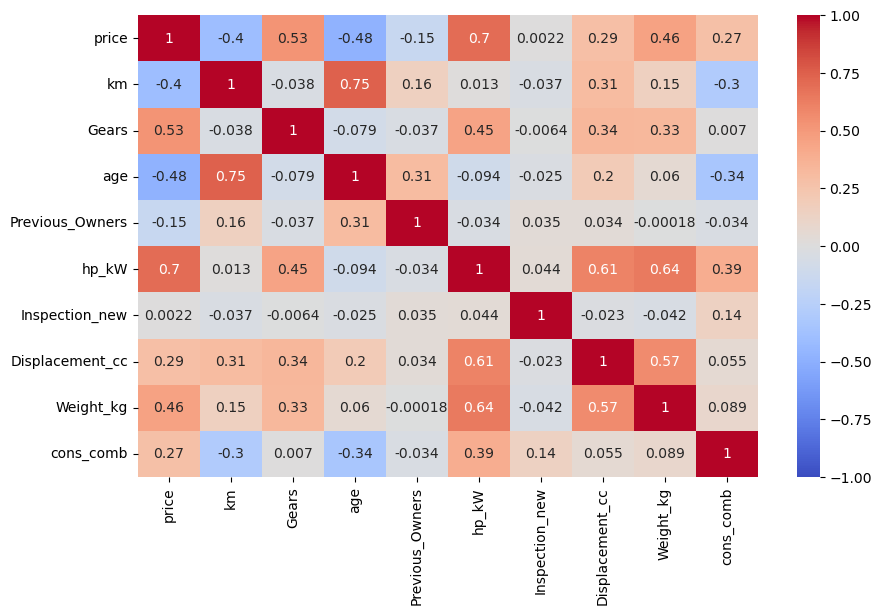

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

In [21]:
df.head(5)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [22]:

df.drop(columns=["Inspection_new", "cons_comb"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

In [23]:
df_object = df.select_dtypes(include ="object").head()
df_object

# select_dtypes(include ="object") to filter only object type features

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [24]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# we see how many unique observations each feature consists of.

# With <30, a 30-character space is left from the leftmost to the ":" sign and feature names are printed in this space.
# The ":" sign is aligned on all lines.

make_model                    : 7
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 6195
Entertainment_Media           : 346
Extras                        : 659
Safety_Security               : 4441
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


### Converting the Comfort_Convenience feature from object to numeric

In [25]:
df.Comfort_Convenience.sample(10)

10252    Air conditioning,Armrest,Automatic climate con...
8054     Air conditioning,Electrical side mirrors,Multi...
1533     Air conditioning,Cruise control,Multi-function...
8420     Air conditioning,Automatic climate control,Cru...
12285    Air conditioning,Cruise control,Electrical sid...
7798     Air conditioning,Electrical side mirrors,Hill ...
3627     Air conditioning,Automatic climate control,Cru...
708      Air conditioning,Armrest,Automatic climate con...
10642    Air conditioning,Automatic climate control,Cru...
10437    Air conditioning,Armrest,Automatic climate con...
Name: Comfort_Convenience, dtype: object

In [26]:
df.Comfort_Convenience.apply(lambda x: len(x.split(',')))

0        16
1         9
2        13
3        16
4        13
         ..
14216    27
14217    20
14218    26
14219    23
14220    24
Name: Comfort_Convenience, Length: 14221, dtype: int64

In [27]:
df["Comfort_Convenience"] = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))

In [28]:
df.Comfort_Convenience.sample(10)

227      15
935      12
11380    23
6531     17
8693      8
3484     15
10861    20
10916    23
9365      2
4463      6
Name: Comfort_Convenience, dtype: int64

In [29]:
df.head() # check Comfort_Convenience feature turned into numeric

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,"Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,Metallic,Cloth,Automatic,1422.000,1220.000,front
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,"Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,Metallic,Cloth,Automatic,1798.000,1255.000,front
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,"MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,Metallic,Cloth,Automatic,1598.000,1135.000,front
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,"Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,Metallic,Cloth,Automatic,1422.000,1195.000,front
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,13,"Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,Metallic,Cloth,Automatic,1422.000,1135.000,front


In [30]:
df.Comfort_Convenience.nunique() # 6195 unique value --> reduced to 33 unique.

33

### Converting the Entertainment_Media  feature from object to numeric

In [31]:
df.Entertainment_Media.sample(10)

6460                      Bluetooth,MP3,On-board computer
1684                 Bluetooth,Hands-free equipment,Radio
812                     Bluetooth,On-board computer,Radio
1053    Bluetooth,CD player,MP3,On-board computer,Radi...
7067    Bluetooth,Hands-free equipment,On-board comput...
3725    Bluetooth,Hands-free equipment,MP3,On-board co...
8243                Bluetooth,MP3,On-board computer,Radio
1956    Bluetooth,CD player,Digital radio,Hands-free e...
8633                Bluetooth,On-board computer,Radio,USB
7357                Bluetooth,On-board computer,Radio,USB
Name: Entertainment_Media, dtype: object

In [32]:
df.Entertainment_Media.apply(lambda x: len(x.split(',')))

0        4
1        5
2        2
3        8
4        7
        ..
14216    7
14217    6
14218    7
14219    5
14220    4
Name: Entertainment_Media, Length: 14221, dtype: int64

In [33]:
df["Entertainment_Media"] = df.Entertainment_Media.apply(lambda x: len(x.split(',')))

# We assign these numbers we find to the relevant feat.

In [34]:
df.head(4)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,"Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,Metallic,Cloth,Automatic,1422.000,1220.000,front
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,"Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,Metallic,Cloth,Automatic,1798.000,1255.000,front
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,"Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,Metallic,Cloth,Automatic,1598.000,1135.000,front
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,8,"Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,Metallic,Cloth,Automatic,1422.000,1195.000,front


In [35]:
df.Entertainment_Media.nunique() # 346 unique value --> reduced to 10 unique.

10

### Converting the Extras feature from object to numeric

In [36]:
df.Extras.sample(10)

# Since we want our ML Model to give more weight to cars with more features,
# we will count the features here and assign the numbers we find
# to the places of the categorical features here.

12517                            Alloy wheels,Touch screen
10619    Alloy wheels,Roof rack,Touch screen,Voice Control
9464                                Alloy wheels,Roof rack
10107    Alloy wheels,Catalytic Converter,Roof rack,Tou...
2518                                      Sport suspension
12033                                         Alloy wheels
7501                             Alloy wheels,Touch screen
6039                                          Alloy wheels
7055                   Alloy wheels,Roof rack,Touch screen
14048                                         Alloy wheels
Name: Extras, dtype: object

In [37]:
df.Extras.apply(lambda x: len(x.split(',')))

0        3
1        4
2        2
3        3
4        4
        ..
14216    3
14217    2
14218    5
14219    3
14220    1
Name: Extras, Length: 14221, dtype: int64

In [38]:
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

# We assign these numbers we find to the relevant feat.

In [39]:
df.head() # check extras feature turned into numeric

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,"ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,Metallic,Cloth,Automatic,1422.000,1220.000,front
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,4,"ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,Metallic,Cloth,Automatic,1798.000,1255.000,front
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,2,"ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,Metallic,Cloth,Automatic,1598.000,1135.000,front
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,8,3,"ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,Metallic,Cloth,Automatic,1422.000,1195.000,front
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,13,7,4,"ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,Metallic,Cloth,Automatic,1422.000,1135.000,front


In [40]:
df.Extras.nunique() 

10

### Converting the Safety_Security  feature from object to numeric

In [41]:
df.Safety_Security.sample(10)

6436     ABS,Central door lock,Driver-side airbag,Fog l...
9817     ABS,Central door lock,Driver-side airbag,Elect...
4190     Daytime running lights,Driver-side airbag,Elec...
7505     ABS,Central door lock,Daytime running lights,D...
11857    ABS,Central door lock,Central door lock with r...
11174    ABS,Central door lock,Daytime running lights,D...
10022    ABS,Central door lock,Daytime running lights,D...
10380    ABS,Adaptive headlights,Central door lock,Dayt...
12780    ABS,Central door lock,Daytime running lights,D...
4994     ABS,Alarm system,Driver-side airbag,Electronic...
Name: Safety_Security, dtype: object

In [42]:
df.Safety_Security.apply(lambda x: len(x.split(',')))

0        14
1        15
2        12
3        14
4        13
         ..
14216    18
14217    19
14218    19
14219    19
14220    18
Name: Safety_Security, Length: 14221, dtype: int64

In [43]:
df["Safety_Security"] = df.Safety_Security.apply(lambda x: len(x.split(',')))

# We assign these numbers we find to the relevant feat.

In [44]:
df.head(3)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,Metallic,Cloth,Automatic,1422.000,1220.000,front
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,Metallic,Cloth,Automatic,1798.000,1255.000,front
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,Metallic,Cloth,Automatic,1598.000,1135.000,front


In [45]:
df.Safety_Security.nunique() # 4441 unique value --> reduced to 29 unique.

29

-------------------------------------------------------

In [46]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

# When we examine these lists, make_model, body_type, vat ,
# Type, Fuel, Paint_Type, Upholstery_type, Gearing_Type, Drive_chain   We see that we will apply
# onehotencoder transformation to featurs.

# OneHotEncoder:
# OneHotEncoder converts categorical features into dummies 0 and 1.
# If we want our model to treat all unique values under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.

# OrdinalEncoder:
# if unique categorical data under a featurea have a hierarchical advantage over
# each other (good, bad, very bad or cheap, average, expensive, very expensive) etc.
# If we want the model to treat all observations according to their superiority,
# that is, not to treat them equally, we use the ordianlencoder conversion algorithm.

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']


In [47]:
#!pip install matplotlib==3.4

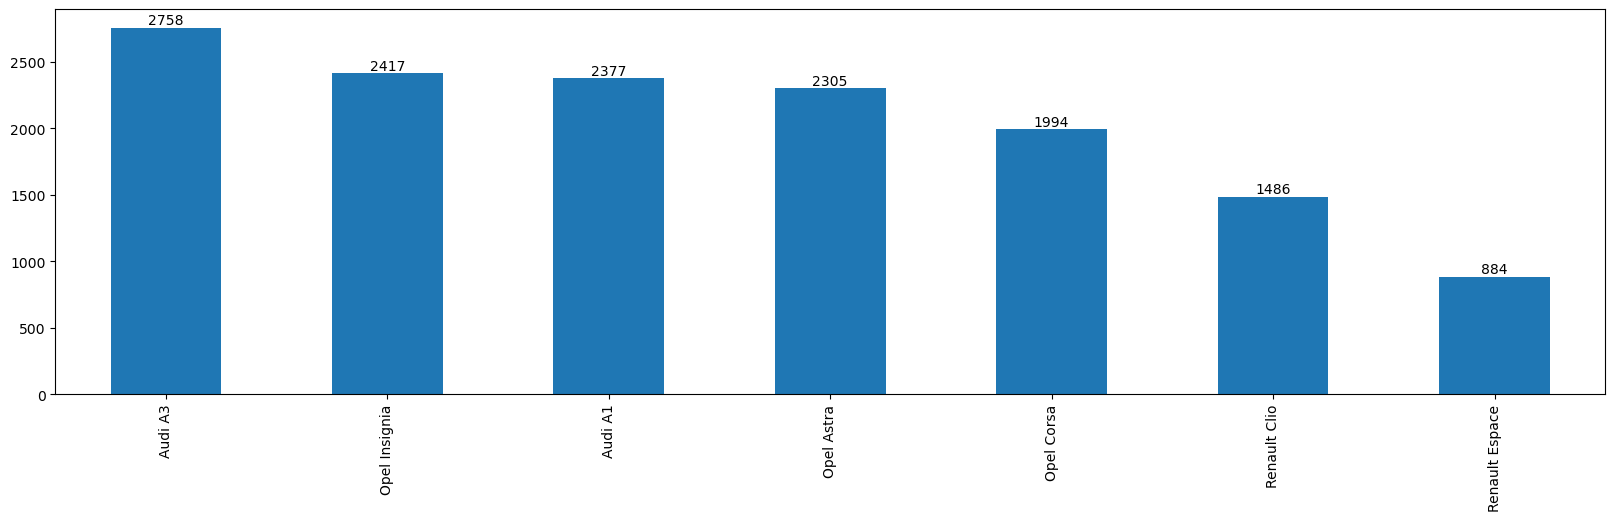

In [48]:
ax = df.make_model.value_counts().iloc[:35].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);


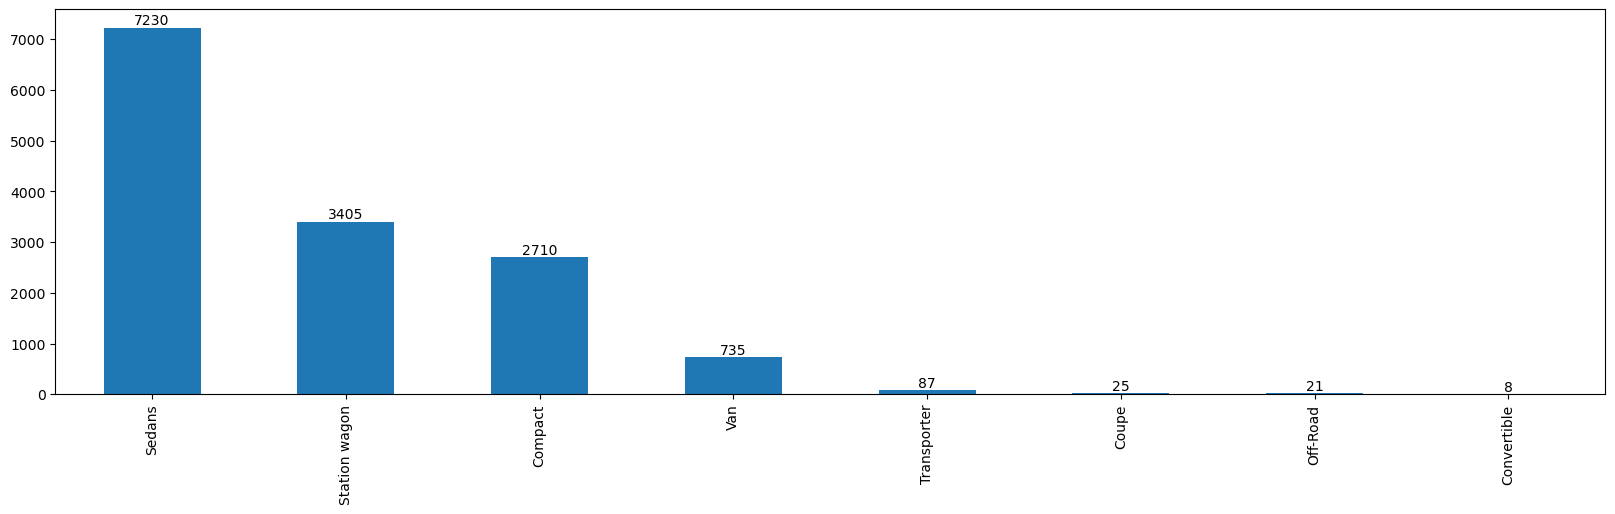

In [49]:
ax = df.body_type.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);



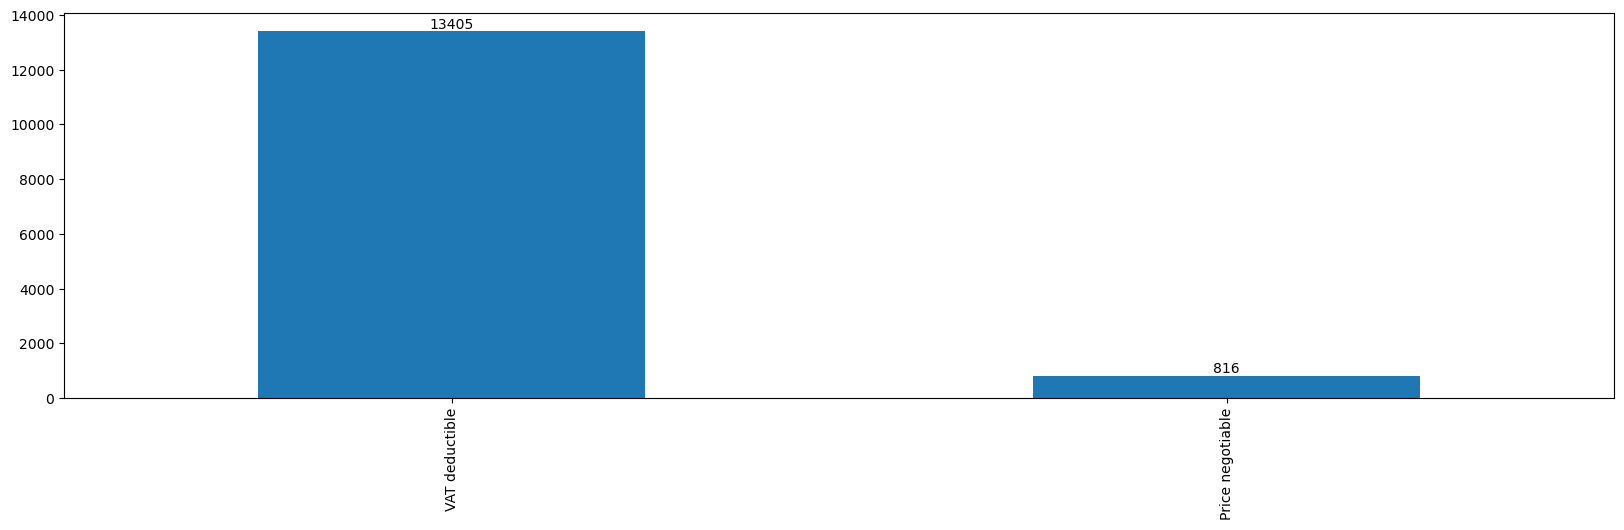

In [50]:
ax = df.vat.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

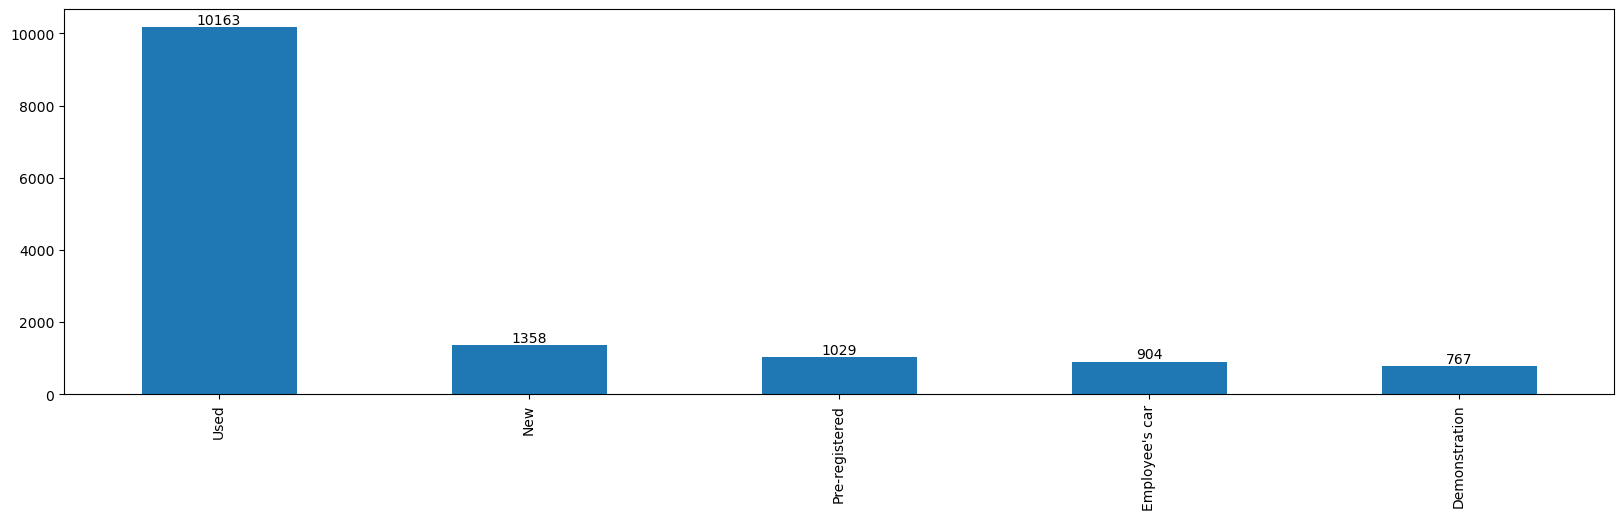

In [51]:
ax = df.Type.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

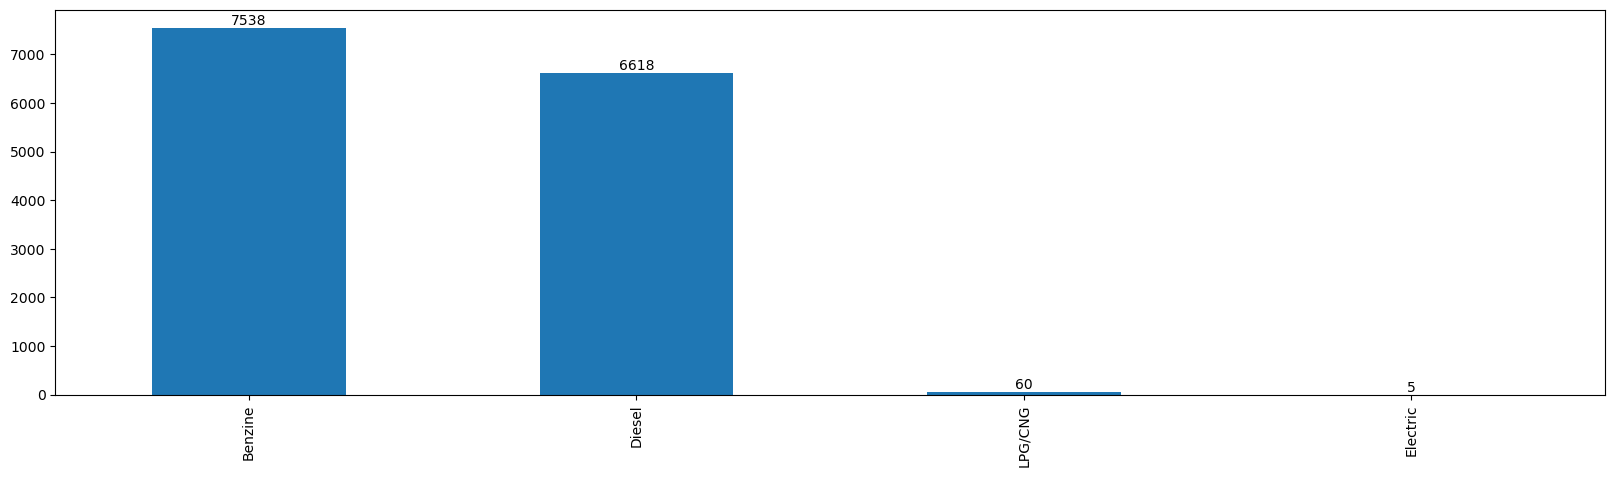

In [52]:
ax = df.Fuel.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

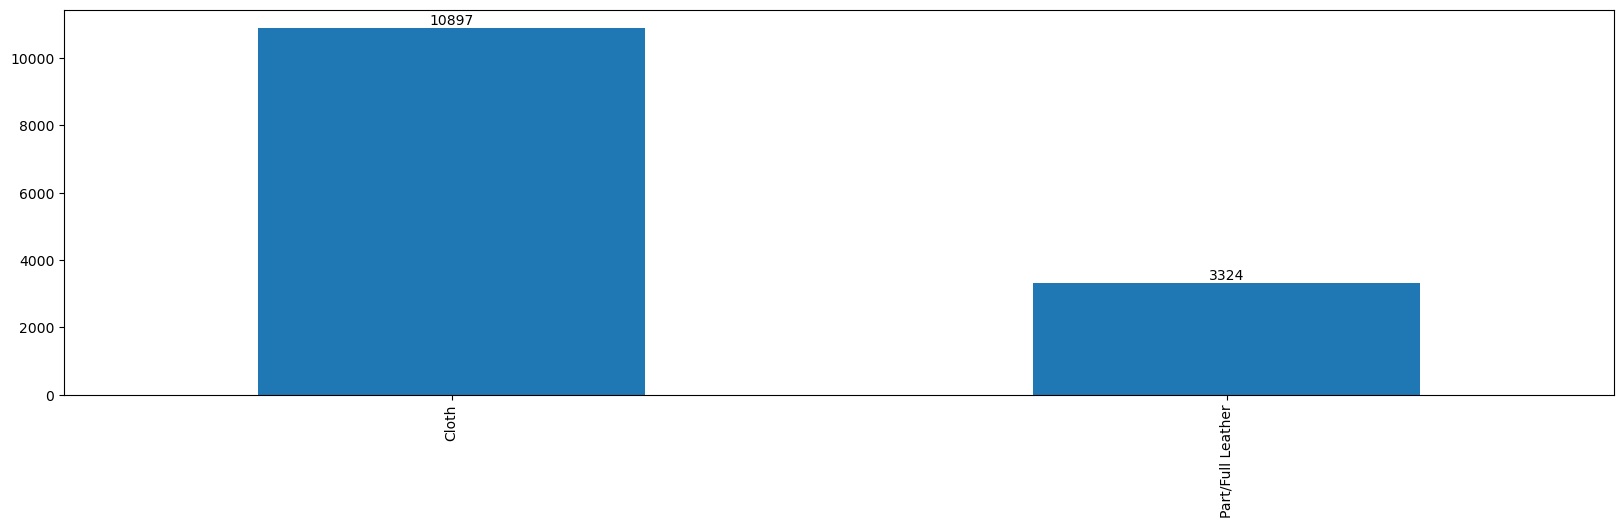

In [53]:
ax = df.Upholstery_type.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

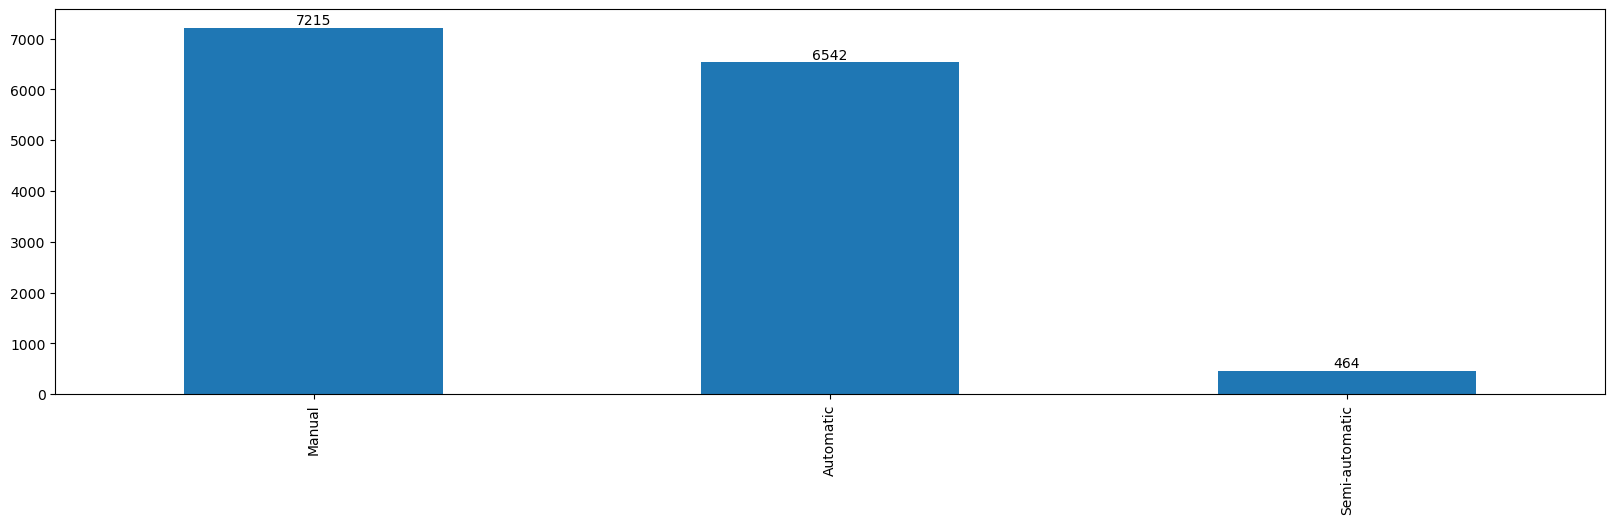

In [54]:
ax = df.Gearing_Type.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

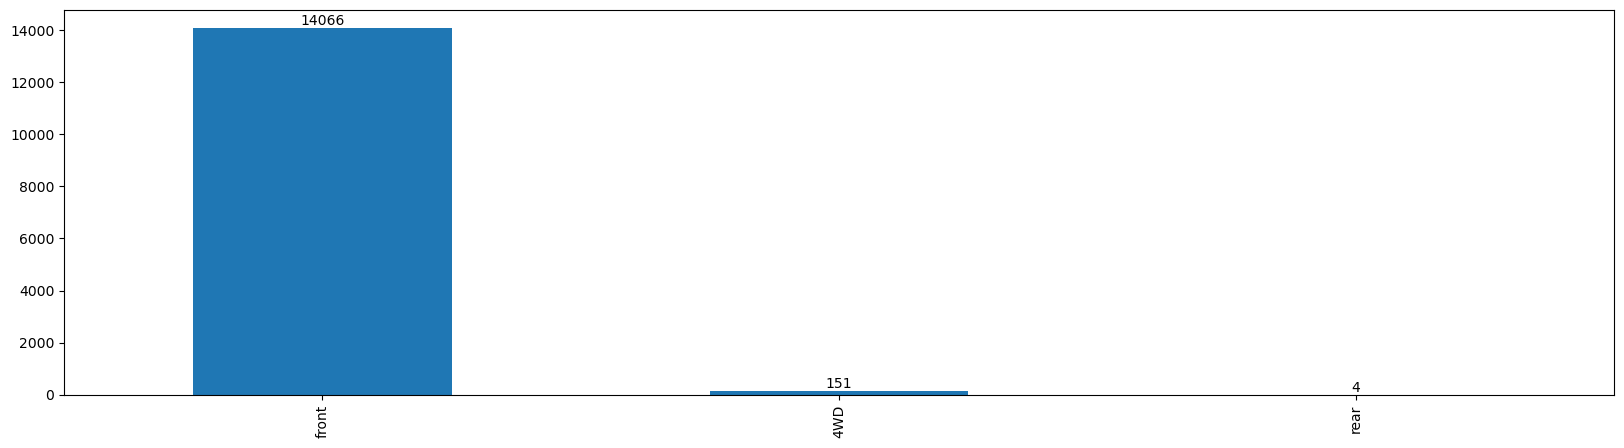

In [55]:
ax = df.Drive_chain.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

## multicollinearity control

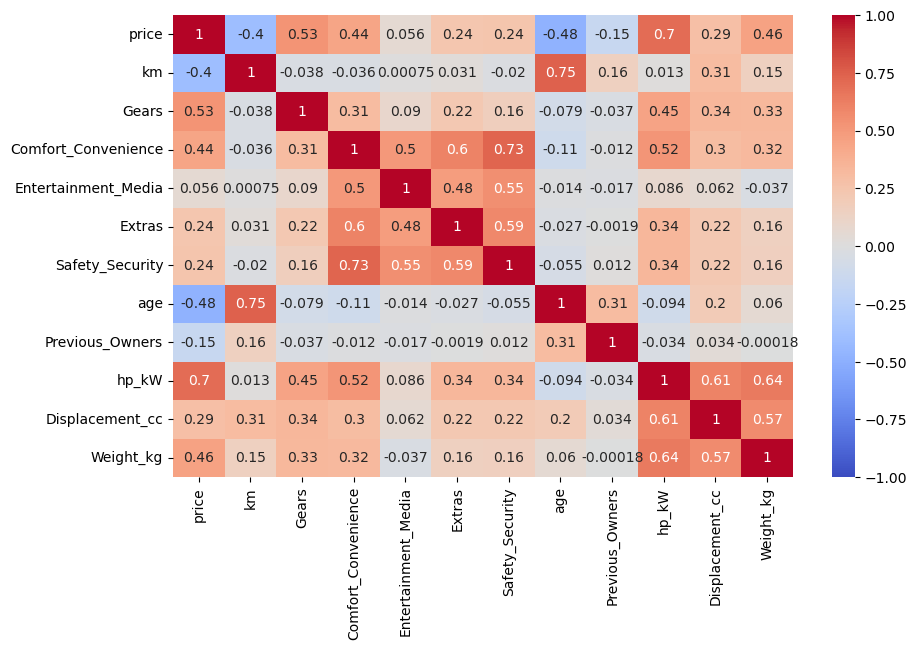

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

In [57]:
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)] .any().any()

# Corr between +/-0.9 and +/-1. We can check multicollinearity for values with this snippet.

False

## Outliers in Price Column

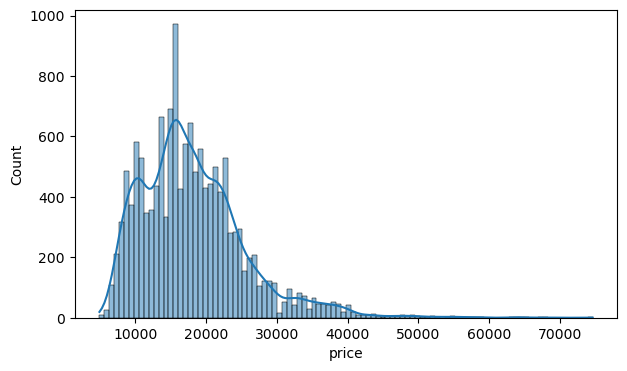

In [58]:
sns.histplot(df.price, bins=100, kde=True);

# Since linear models are very sensitive to outliers, I am trying to detect outliers in the data with histplot.
# Let's not forget that outlier for ML means that the data of a group or groups in our data is insufficient for training.
# By looking at the image below, we see that the number of vehicles over 70.000 EURO is very low.
# Based on this image, we can evaluate that the number of vehicles over 70 thousand EURO may be insufficient for training.
# However, we cannot understand whether it is inadequate or not without training.
# We should decide by both dropping the observations that we consider as outliers and
# comparing the scores by doing the training without dropping them.

# Also, looking at the histplot for all the data may mislead us about the outlier.
# For outlier detection, we should group the data in our data (Opel Astra, Ford Fiesta, Volvo S60 etc.)
# and determine the outlier accordingly.

In [59]:
skew(df.price)

1.2668278550941403

<Axes: >

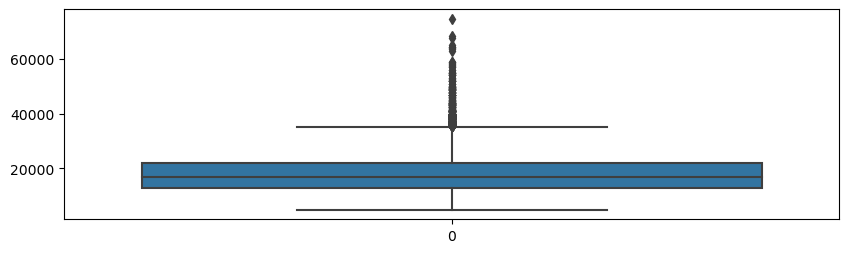

In [60]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)



# We can get insights about outliers via boxplot. However, these insights can mislead us.
# In order to make more accurate comments, we can use the stripplot showing the distribution


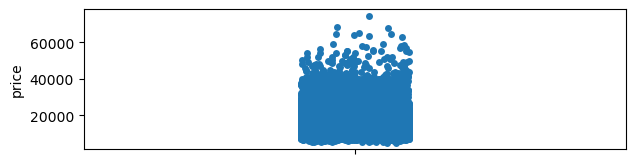

In [61]:
plt.subplot(212)
sns.stripplot(df.price);

In [62]:
#conda install -c anaconda ipywidgets

In [63]:
from ipywidgets import interact

def box_strip(model):
    sns.boxplot(data = df[df.make_model==model],
                x= "make_model",
                y = "price",
                palette='bright')

    sns.stripplot(data = df[df.make_model==model],
                x= "make_model",
                y = "price",
                palette='Set1')
model = df.make_model.unique()
interact(box_strip, model=model);

# This code defines the function to plot an interactive boxplot and stripplot using the ipywidgets and seaborn libraries.
# The function superimposes the boxplot and stripplot graph showing the prices of different car models covered by the data.
# The interact() function allows the box_strip function to run by selecting the user through the interface.
# This selection determines the car model that will be used to draw the graph.

interactive(children=(Dropdown(description='model', options=('Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa',…

In [64]:
df.make_model.unique()

# unique groups in our data

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Espace'], dtype=object)

In [65]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))


 The count of outlier for Audi A1                  : 5 ,    The rate of outliers : 0.002
 The count of outlier for Audi A3                  : 56,    The rate of outliers : 0.02
 The count of outlier for Opel Astra               : 127,    The rate of outliers : 0.055
 The count of outlier for Opel Corsa               : 0 ,    The rate of outliers : 0.0
 The count of outlier for Opel Insignia            : 109,    The rate of outliers : 0.045
 The count of outlier for Renault Clio             : 37,    The rate of outliers : 0.025
 The count of outlier for Renault Espace           : 20,    The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### OneHotEncoder

In [66]:
import sklearn
sklearn.__version__


'1.2.2'

In [67]:
from sklearn.model_selection import train_test_split


In [68]:
from sklearn.preprocessing import OneHotEncoder


# OneHotEncoder converts categorical features into dummies 0 and 1 features. If we want our model to treat
# all unique values under the categorical feature equally, we convert our categorical data to 0 and 1 using
# the onehotencoder conversion algorithm. We could also use the get_dummies() function for this conversion,
# but since applying get_dummies() to all data and then separating the data into train and test sets will
# cause data leakege, categorical observations for the data we prepared for ML models dummies features must be
# done with the onehotencoder conversion algorithm.

# However, when converting to categorical data, the following should not be forgotten:
# if there is a hierarchical superiority or ranking (expensive, normal, cheap or Large, average, small, etc.)
# among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.

# Conversion of categorical data to dummies features is done according to the unique categorical data in
# the train set where the fit operation is performed. With the handle_unknown = "ignore" parameter,
# all categorical data passed in the test set and not in the train set are converted to 0.
# The default for this parameter is handle_unknown = "error". If the handle_unknown parameter remains at
# its default value, the onehotencoder algorithm will fail for an observation that is in the test set but
# not in the train set.

# In sklearn 1.2 versions, with the set_output(transform="pandas") code,
# it transforms the outputs converted into array after conversion into a dataframe
# with the feature names of the data to which it is fitted.

### OrdinalEncoder

In [69]:
from sklearn.preprocessing import OrdinalEncoder



### Train | Test Split

In [70]:
df2 = df.copy()

In [71]:
X= df2.drop(columns="price")
y= df2.price

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Converting Object Features into Numerical Features Using Make Column Transformer

In [73]:
df2.select_dtypes(include="object").head(15)

,make_model,body_type,vat,Type,Fuel,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
5,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Part/Full Leather,Automatic,front
6,Audi A1,Station wagon,VAT deductible,Used,Diesel,Metallic,Part/Full Leather,Automatic,front
7,Audi A1,Compact,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
8,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
9,Audi A1,Sedans,VAT deductible,Used,Benzine,Metallic,Cloth,Automatic,front


In [74]:
df2.Type.unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered'],
      dtype=object)

In [75]:
cat_onehot = ['make_model', 'body_type', 'vat', 'Fuel', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Type']

cat_for_type = ["Used", "Employee's car", 'New', "Demonstration", "Pre-registered"]


# We specify the features we will convert to onohotencoder in the cat_onehot list,
# and the features that we will convert to ordinalencoder in the cat_ordinal list.

# Since the model does not know in which order the features we will transform will be numbered,
# we give this order to the model manually.

In [76]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_type,]),cat_ordinal),
                         remainder='passthrough',
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

# make_column_transformer function automates transformations to features. It transforms the features
# in order according to the order we will give into this function.

# What does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
# With the handle_unknown = "ignore" parameter, onehotencoder converts all the features in
# the cat_onehot list so that all categorical data passed in the test set and
# not in the train set will be converted to 0.

# What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
# After the onehotencoder conversion to the relevant features, all features in the cat_ordinal list
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical
# observations in the categories list.

# IMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be
# the same as the order of the features in the cat_ordinal list, or you will get an error.

# With remainder='passthrough' it means to leave all other features that are not converted.
# if the remainder is "dropped" with the default value, all non-converted features will be dropped from df.
# remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for
# the non-transformed features.

# verbose_feature_names_out=True make_column_transform function, so that it is clear which conversion function
# does which feature, "onehotencoder<__>" prefix at the beginning of onehotencoder conversions,
# ordinalencoder conversions. It is prefixed with "ordinalencoder<__>", and those with remainder operations
# are prefixed with "remainder__". If you want to remove these prefixes, we need to set verbose_feature<_>names_out=False.

In [77]:
X_train.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
14210,Renault Espace,Compact,VAT deductible,500.000,Demonstration,Benzine,6.000,26,7,2,19,0.000,1.000,165.000,Metallic,Cloth,Automatic,1798.000,1760.000,front
10027,Opel Insignia,Station wagon,VAT deductible,68116.000,Used,Diesel,6.000,13,6,3,13,3.000,1.000,100.000,Metallic,Cloth,Manual,1598.000,1487.000,front
318,Audi A1,Compact,VAT deductible,56967.000,Used,Benzine,7.000,13,6,2,13,3.000,2.000,70.000,Metallic,Cloth,Automatic,999.000,1180.000,front
4098,Audi A3,Sedans,VAT deductible,21000.000,Employee's car,Diesel,6.000,17,8,4,18,1.000,1.000,85.000,Metallic,Part/Full Leather,Manual,1598.000,1335.000,front
3344,Audi A3,Sedans,VAT deductible,26613.000,Used,Benzine,7.000,16,7,3,13,2.000,1.000,110.000,Metallic,Cloth,Automatic,1395.000,1300.000,front


In [78]:
X_test.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
7261,Opel Astra,Station wagon,VAT deductible,1647.363,New,Benzine,6.000,17,5,1,14,0.000,1.000,67.000,Metallic,Cloth,Manual,1000.000,1425.000,front
8215,Opel Corsa,Sedans,VAT deductible,31398.000,Used,Diesel,5.000,4,4,1,9,2.000,1.000,55.000,Metallic,Cloth,Manual,1248.000,1162.000,front
13945,Renault Espace,Van,VAT deductible,29500.000,Used,Diesel,6.000,15,5,2,7,2.000,1.000,118.000,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front
6684,Opel Astra,Sedans,VAT deductible,16950.000,Used,Benzine,6.000,9,4,2,13,1.000,1.000,92.000,Metallic,Cloth,Manual,1399.000,1278.000,front
13394,Renault Espace,Van,Price negotiable,41000.000,Used,Diesel,6.000,16,4,2,12,2.000,1.000,118.000,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front


In [79]:
X_train.shape, X_test.shape

((11376, 20), (2845, 20))

In [80]:
column_trans.fit_transform(X_train).head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg
14210,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,500.000,6.000,26,7,2,19,0.000,1.000,165.000,1798.000,1760.000
10027,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,68116.000,6.000,13,6,3,13,3.000,1.000,100.000,1598.000,1487.000
318,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,56967.000,7.000,13,6,2,13,3.000,2.000,70.000,999.000,1180.000
4098,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,21000.000,6.000,17,8,4,18,1.000,1.000,85.000,1598.000,1335.000
3344,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,26613.000,7.000,16,7,3,13,2.000,1.000,110.000,1395.000,1300.000


In [81]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [82]:
X_train_trans.shape, X_test_trans.shape 

((11376, 44), (2845, 44))

In [83]:
X_train_trans.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg
14210,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,500.000,6.000,26,7,2,19,0.000,1.000,165.000,1798.000,1760.000
10027,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,68116.000,6.000,13,6,3,13,3.000,1.000,100.000,1598.000,1487.000
318,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,56967.000,7.000,13,6,2,13,3.000,2.000,70.000,999.000,1180.000
4098,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,21000.000,6.000,17,8,4,18,1.000,1.000,85.000,1598.000,1335.000
3344,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,26613.000,7.000,16,7,3,13,2.000,1.000,110.000,1395.000,1300.000


In [84]:
X_test_trans.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg
7261,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,2.000,1647.363,6.000,17,5,1,14,0.000,1.000,67.000,1000.000,1425.000
8215,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,31398.000,5.000,4,4,1,9,2.000,1.000,55.000,1248.000,1162.000
13945,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,29500.000,6.000,15,5,2,7,2.000,1.000,118.000,1598.000,1734.000
6684,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,16950.000,6.000,9,4,2,13,1.000,1.000,92.000,1399.000,1278.000
13394,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,41000.000,6.000,16,4,2,12,2.000,1.000,118.000,1598.000,1734.000


In [85]:
X_train_trans.join(y_train).corr()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,price
make_model_Audi A1,1.000,-0.219,-0.197,-0.179,-0.201,-0.153,-0.115,0.210,-0.010,-0.006,-0.018,0.095,-0.241,-0.033,-0.105,0.007,-0.007,0.160,-0.157,-0.007,-0.027,0.002,-0.004,-0.002,0.162,-0.162,-0.018,0.028,-0.028,-0.038,0.038,-0.007,-0.017,-0.131,0.016,-0.055,0.005,0.014,-0.074,-0.025,-0.003,-0.207,-0.403,-0.320,0.042
make_model_Audi A3,-0.219,1.000,-0.218,-0.198,-0.222,-0.168,-0.127,-0.168,0.047,0.003,-0.020,0.330,-0.166,-0.036,-0.116,0.037,-0.037,-0.242,0.235,0.019,0.054,-0.031,-0.014,0.033,0.058,-0.058,-0.026,-0.032,0.166,-0.016,0.017,-0.008,-0.025,0.084,0.378,-0.097,0.012,-0.007,-0.072,0.048,-0.062,0.031,0.157,0.084,0.187
make_model_Opel Astra,-0.197,-0.218,1.000,-0.178,-0.199,-0.151,-0.115,-0.154,-0.010,-0.012,-0.012,-0.086,0.304,-0.033,-0.104,-0.058,0.058,0.018,-0.015,-0.007,-0.019,0.049,0.004,-0.050,0.063,-0.063,-0.020,0.042,-0.062,-0.040,0.040,-0.007,-0.021,0.060,-0.066,0.109,0.012,0.019,0.050,-0.022,0.023,0.073,-0.009,0.036,-0.132
make_model_Opel Corsa,-0.179,-0.198,-0.178,1.000,-0.181,-0.138,-0.104,0.406,-0.009,0.029,-0.003,-0.083,-0.226,-0.012,-0.093,-0.013,0.013,0.330,-0.331,-0.007,0.005,-0.019,0.025,0.016,0.211,-0.211,-0.049,0.053,-0.013,-0.040,0.041,-0.007,0.044,-0.084,-0.333,-0.252,0.015,-0.160,-0.111,-0.044,0.063,-0.425,-0.139,-0.349,-0.383
make_model_Opel Insignia,-0.201,-0.222,-0.199,-0.181,1.000,-0.154,-0.117,-0.204,-0.010,-0.012,0.017,-0.164,0.439,-0.033,-0.105,-0.052,0.052,-0.183,0.186,-0.007,-0.027,0.044,-0.013,-0.042,-0.270,0.270,0.044,-0.015,-0.083,0.116,-0.120,0.036,-0.028,0.078,0.137,0.356,0.050,0.262,0.287,-0.003,-0.031,0.430,0.390,0.447,0.204
make_model_Renault Clio,-0.153,-0.168,-0.151,-0.138,-0.154,1.000,-0.089,0.034,-0.008,-0.006,0.001,0.055,-0.061,0.045,-0.079,0.087,-0.087,0.059,-0.062,0.012,0.026,-0.063,0.011,0.062,0.045,-0.045,-0.088,0.087,0.002,-0.011,0.012,-0.006,0.019,-0.028,-0.279,-0.239,-0.103,-0.141,-0.149,0.027,-0.013,-0.237,-0.206,-0.313,-0.284
make_model_Renault Espace,-0.115,-0.127,-0.115,-0.104,-0.117,-0.089,1.000,-0.119,-0.006,0.008,0.053,-0.252,-0.102,0.173,0.902,0.009,-0.009,-0.141,0.143,-0.004,-0.016,0.013,-0.007,-0.012,-0.378,0.378,0.215,-0.218,0.012,0.036,-0.035,-0.004,0.055,0.007,0.076,0.190,-0.014,-0.038,0.059,0.027,0.046,0.397,0.230,0.500,0.420
body_type_Compact,0.210,-0.168,-0.154,0.406,-0.204,0.034,-0.119,1.000,-0.011,-0.019,-0.019,-0.491,-0.271,-0.036,-0.113,-0.061,0.061,0.277,-0.273,-0.008,-0.029,0.069,-0.014,-0.068,0.162,-0.162,0.002,0.013,-0.041,-0.039,0.040,-0.008,0.070,-0.122,-0.166,-0.133,0.030,-0.107,-0.108,-0.078,0.034,-0.304,-0.261,-0.386,-0.186
body_type_Convertible,-0.010,0.047,-0.010,-0.009,-0.010,-0.008,-0.006,-0.011,1.000,-0.001,-0.001,-0.023,-0.013,-0.002,-0.005,0.010,-0.010,-0.001,0.002,-0.000,-0.001,0.005,-0.001,-0.004,-0.033,0.033,-0.006,-0.023,0.082,0.036,-0.036,-0.000,-0.013,-0.004,0.029,0.002,0.002,0.011,0.000,0.009,-0.003,0.031,0.025,0.017,0.032
body_type_Coupe,-0.006,0.003,-0.012,0.029,-0.012,-0.006,0.008,-0.019,-0.001,1.000,-0.002,-0.041,-0.022,-0.003,-0.009,0.065,-0.065,0.002,-0.002,-0.001,-0.002,-0.004,-0.001,0.004,-0.004,0.004,-0.001,0.004,-0.007,-0.004,0.004,-0.001,-0.014,-0.006,-0.009,-0.039,-0.003,-0.016,-0.038,0.021,-0.011,-0.008,-0.010,-0.013,-0.017


In [86]:
import plotly.express as px

corr = X_train_trans.join(y_train).corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

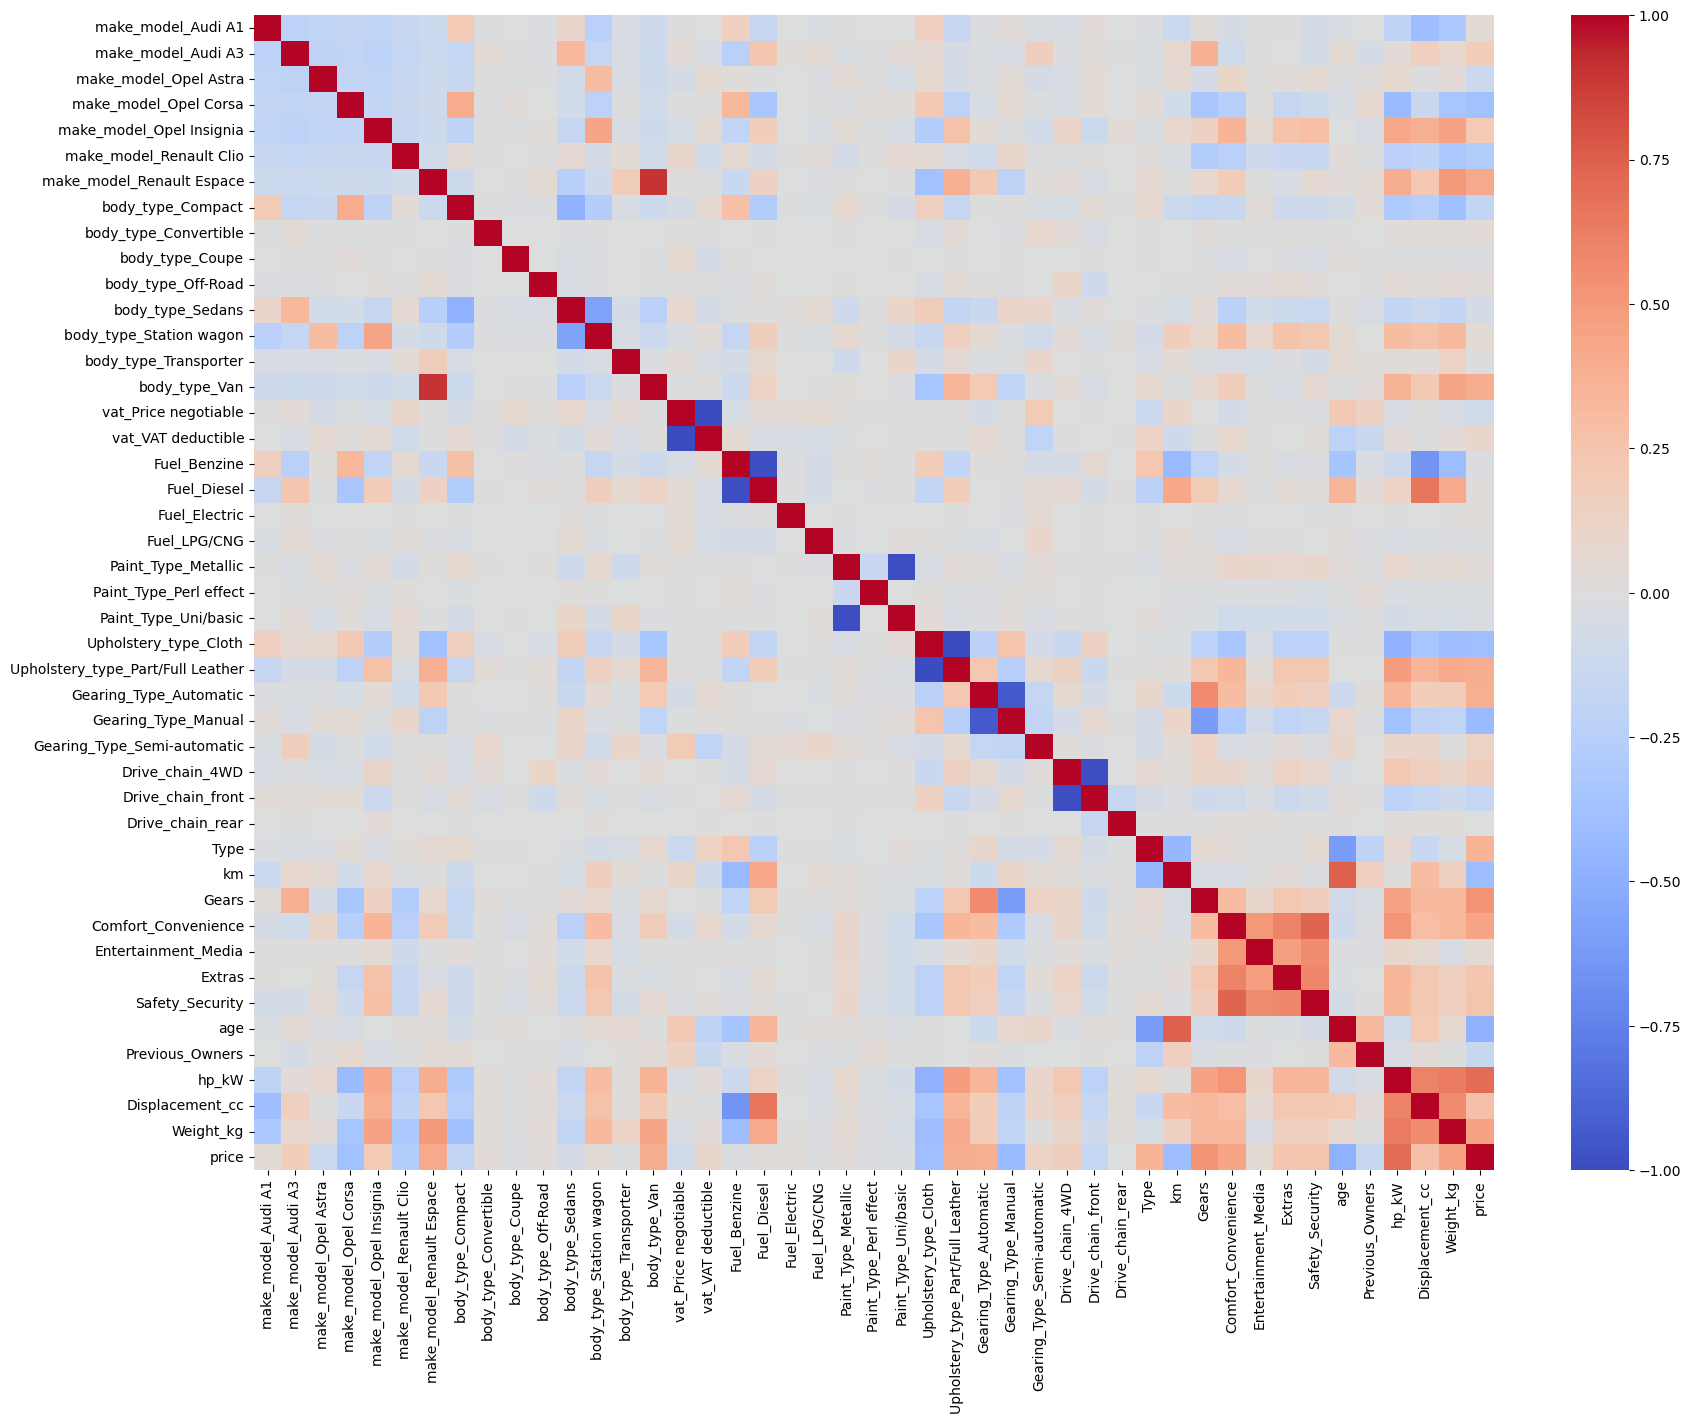

In [87]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_trans.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm");

### Scaling

In [88]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [89]:
X_train_scaled.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg
14210,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.750,0.002,0.333,0.781,0.667,0.111,0.643,0.000,0.250,0.492,0.437,0.564
10027,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.215,0.333,0.375,0.556,0.222,0.429,1.000,0.250,0.236,0.341,0.397
318,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.180,0.667,0.375,0.556,0.111,0.429,1.000,0.500,0.118,0.052,0.208
4098,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.250,0.066,0.333,0.500,0.778,0.333,0.607,0.333,0.250,0.177,0.341,0.303
3344,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.084,0.667,0.469,0.667,0.222,0.429,0.667,0.250,0.276,0.243,0.282


In [90]:
X_test_scaled.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg
7261,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.500,0.005,0.333,0.500,0.444,0.000,0.464,0.000,0.250,0.106,0.053,0.359
8215,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.099,0.000,0.094,0.333,0.000,0.286,0.667,0.250,0.059,0.172,0.197
13945,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.093,0.333,0.438,0.444,0.111,0.214,0.667,0.250,0.307,0.341,0.548
6684,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.053,0.333,0.250,0.333,0.111,0.429,0.333,0.250,0.205,0.245,0.269
13394,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.129,0.333,0.469,0.333,0.111,0.393,0.667,0.250,0.307,0.341,0.548


## Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [91]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

In [92]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [93]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.861,0.860
mae,1926.367,1885.100
mse,7657044.416,7638759.895
rmse,2767.137,2763.831


### Adjusted R2 Score

In [94]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations
    p = X.shape[1] # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# If there are too many features in our data, but not enough rows, which makes a false improvement in our model's R2_score.
# Especially in such data or if too many new features (such as dummies feature) have been added to our data.
# We need to detect the real R2_score with adjusted R2_score.

# Adjusted R2_score Checks the trade off between the number of rows and the feature,
# and returns us a score. If there is a large imbalance between the numbers,
# there will be serious decreases in the adjusted_R2_score.

# We define the above function for Adjusted R2 Score.

In [95]:
y_pred = lm.predict(X_test_scaled)

# yukarda tanımladığımız fonksiyon içerisinde kullanmak için modelden predictionlarımızı (y_pred) alıyoruz.

In [96]:
adj_r2(y_test, y_pred, X_test_scaled)

# gerekli parametreleri fonksiyona vererek skorumuzu elde ediyoruz.

0.8581215761040656

### Cross Validate

In [97]:
model = LinearRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

# As we learned in our previous lessons, we perform the overfiting control by comparing the train and
# validation scores we receive through cross validaition.

In [98]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.042,0.003,0.863,0.861,-1938.269,-1927.182,-7790669.933,-7644998.686,-2791.177,-2764.959
1,0.021,0.005,0.855,0.862,-1943.235,-1927.952,-8044676.421,-7622434.729,-2836.314,-2760.876
2,0.015,0.003,0.881,0.859,-1873.699,-1938.896,-6578308.117,-7778546.515,-2564.821,-2789.005
3,0.019,0.002,0.865,0.861,-1860.400,-1941.699,-6532447.024,-7784054.780,-2555.865,-2789.992
4,0.014,0.002,0.855,0.862,-1945.560,-1929.869,-7640080.034,-7665555.804,-2764.069,-2768.674
5,0.014,0.002,0.861,0.861,-1911.853,-1930.076,-7187238.801,-7715001.168,-2680.903,-2777.589
6,0.014,0.002,0.854,0.862,-1976.230,-1911.379,-8887968.009,-7528780.156,-2981.270,-2743.862
7,0.014,0.002,0.863,0.861,-1920.409,-1922.606,-7741342.611,-7651338.860,-2782.327,-2766.105
8,0.016,0.002,0.839,0.864,-2070.572,-1907.841,-9171739.566,-7492584.128,-3028.488,-2737.259
9,0.014,0.002,-3041750398954558193664.000,0.861,-21350725239220.188,-1925.696,-172768464432486609087908282368.000,-7635411.297,-415654260693291.375,-2763.225


In [99]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# We see that the scores between the train and validaiton set and the train set are close to each other.
# There is no overfitting.

test_r2                                     -304175039895455793152.000
train_r2                                                         0.861
test_neg_mean_absolute_error                        -2135072525666.042
train_neg_mean_absolute_error                                -1926.320
test_neg_mean_squared_error         -17276846443248660029181526016.000
train_neg_mean_squared_error                              -7651870.612
test_neg_root_mean_squared_error                   -41565426071827.664
train_neg_root_mean_squared_error                            -2766.155
dtype: float64

In [100]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.861,0.860
mae,1926.367,1885.100
mse,7657044.416,7638759.895
rmse,2767.137,2763.831


In [101]:
2763/df.price.mean()

# According to the rmse score we get from the test set (hold out set) score we will give to the customer,
# our model makes an average of 15% error.

0.15258935134356208

### Prediction Error with Outliers

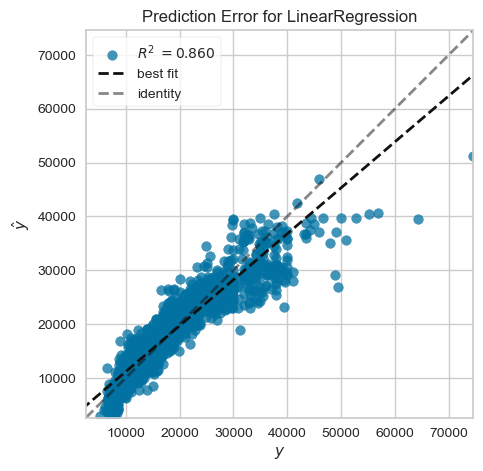

In [102]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();



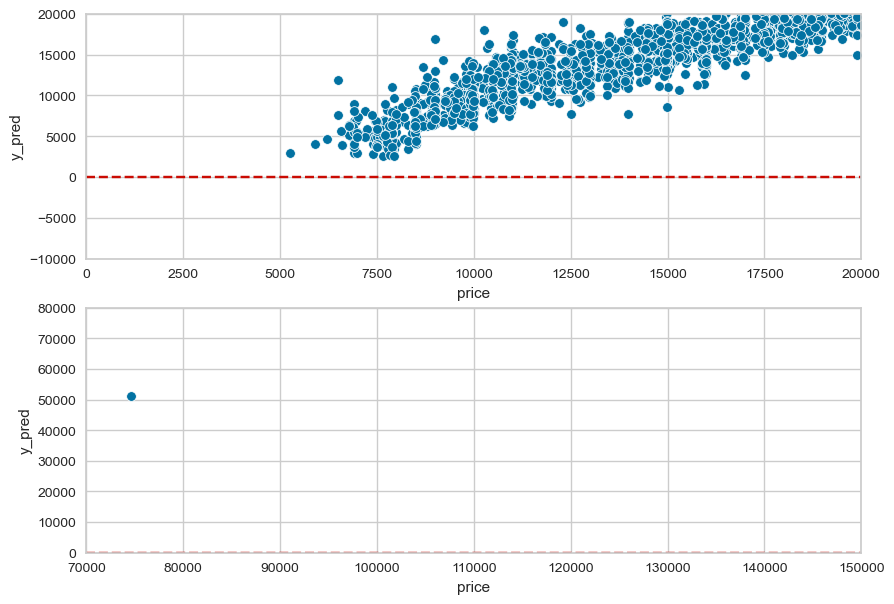

In [103]:
y_pred=lm.predict(X_test_scaled)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([0,20000])
plt.ylim([-10000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([70000, 150000])
plt.ylim([0,80000])
plt.show();



### Residual Plot with Outliers

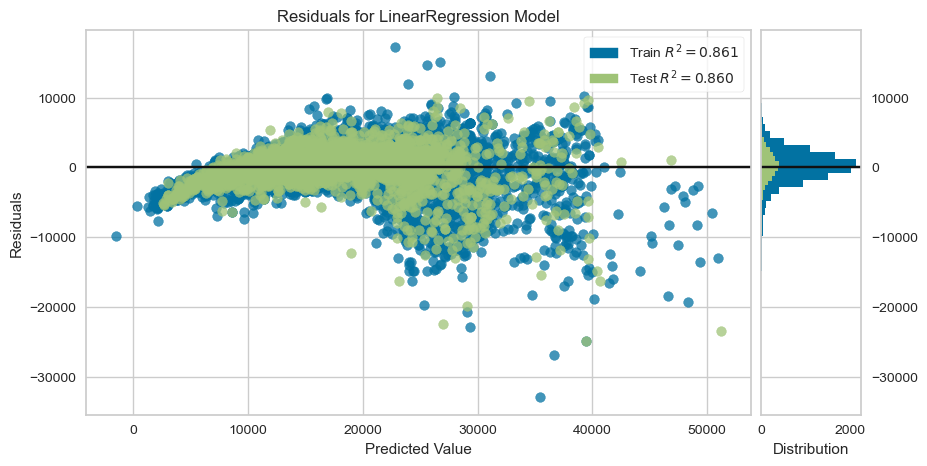

In [104]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();


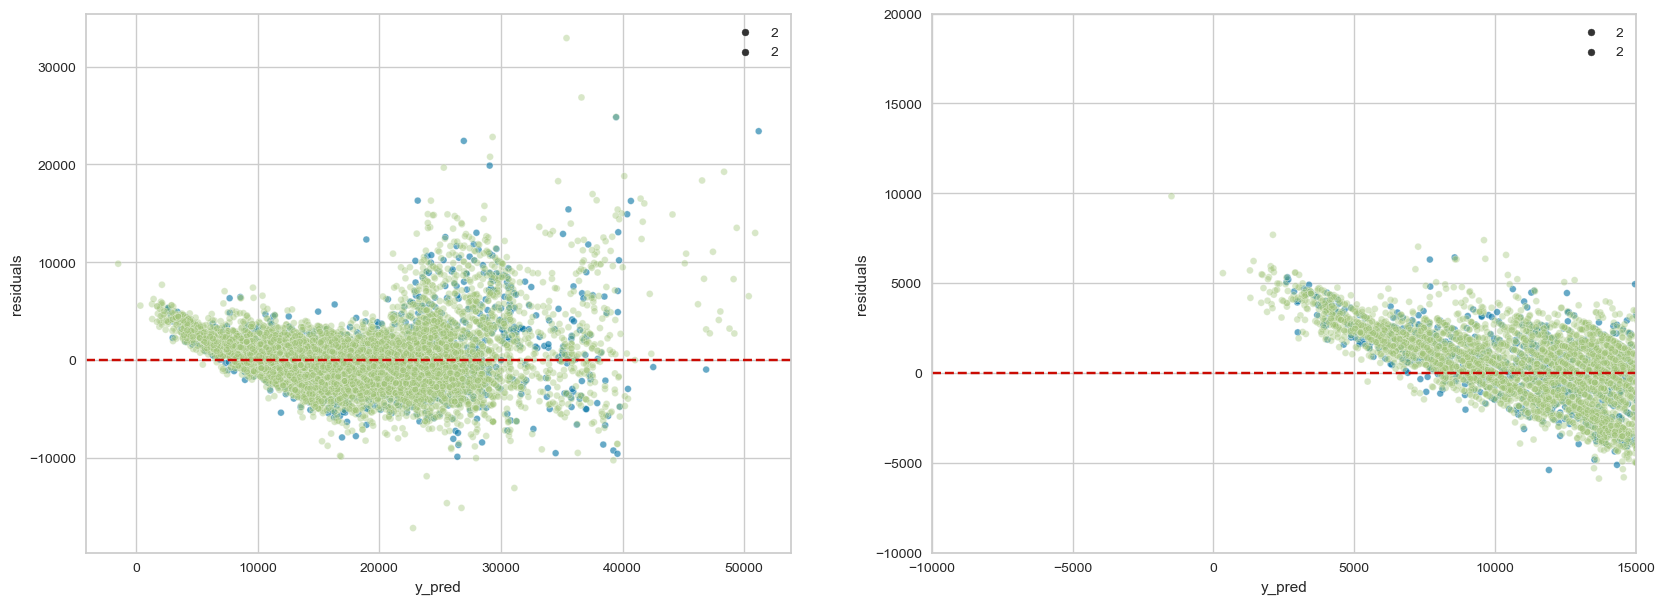

In [105]:
y_pred=lm.predict(X_test_scaled)
y_pred_train = lm.predict(X_train_scaled)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();



## Filtering Data and Rebuilding The Model

In [106]:
df3 = df[(df.price <55000)]
df3

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,Metallic,Cloth,Automatic,1422.000,1220.000,front
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,Metallic,Cloth,Automatic,1798.000,1255.000,front
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,Metallic,Cloth,Automatic,1598.000,1135.000,front
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,Metallic,Cloth,Automatic,1422.000,1195.000,front
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,Metallic,Cloth,Automatic,1422.000,1135.000,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14216,Renault Espace,Van,39980,VAT deductible,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front
14217,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front
14218,Renault Espace,Van,39950,VAT deductible,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front
14219,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,Metallic,Cloth,Automatic,1798.000,1708.000,front


In [107]:
X = df3.drop(columns = "price")
y = df3.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [108]:
X_train= column_trans.fit_transform(X_train)
X_test= column_trans.transform(X_test)

In [109]:
X_train.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg
318,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,56967.000,7.000,13,6,2,13,3.000,2.000,70.000,999.000,1180.000
9972,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,100000.000,6.000,19,8,8,20,3.000,1.000,100.000,1598.000,1613.000
6755,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,22000.000,5.000,15,5,1,15,1.000,1.000,77.000,998.000,1273.000
12869,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,3.000,19350.000,6.000,18,7,6,16,1.000,1.000,162.000,1618.000,1279.000
5935,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,11534.000,6.000,16,5,2,15,1.000,1.000,110.000,1399.000,1278.000


In [110]:
X_test.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg
5094,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,201.000,6.000,13,3,1,9,0.000,1.000,85.000,1598.000,1333.000
7207,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,4956.000,5.000,18,1,2,13,0.000,1.000,77.000,999.000,1273.000
10292,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,34825.000,6.000,16,5,2,14,2.000,2.000,121.000,1490.000,1487.000
10138,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,55000.000,6.000,23,8,5,24,3.000,2.000,100.000,1598.000,1701.000
9700,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,163383.000,6.000,15,4,1,12,3.000,1.000,100.000,1598.000,1613.000


In [111]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [113]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.863,0.865
mae,1893.555,1843.983
mse,7205476.780,6859809.081
rmse,2684.302,2619.124


In [114]:
2620/df.price.mean()

# While models made an average of 15% errors, this rate decreased to 14 % after outlies were dropped.

0.14469203782849535

### Prediction Error without Outliers

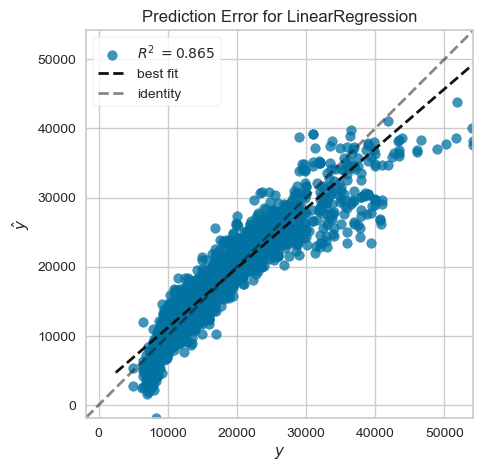

In [115]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();

# After removing the outlier values, we see that the angle between the best fit line and
# the identity line narrows even more.

### Residual Plot without Outliers

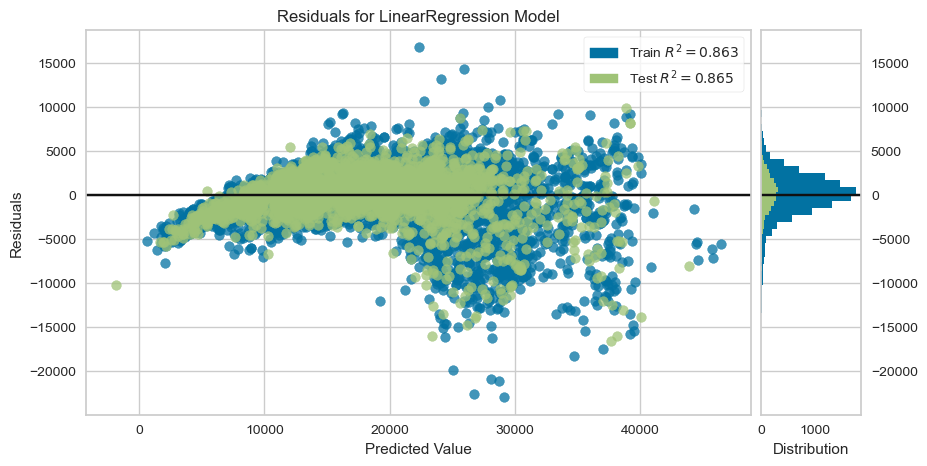

In [116]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();



In [117]:
model = LinearRegression()
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)

# We are checking overfitting according to our new data.

In [118]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

# Since train and test scores are close, we can say there is no overfitting.

test_r2                                    0.862
train_r2                                   0.863
test_neg_mean_absolute_error           -1904.487
train_neg_mean_absolute_error          -1894.396
test_neg_mean_squared_error         -7285593.867
train_neg_mean_squared_error        -7204212.555
test_neg_root_mean_squared_error       -2695.939
train_neg_root_mean_squared_error      -2684.025
dtype: float64

In [119]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)



,train,test
R2,0.863,0.865
mae,1893.555,1843.983
mse,7205476.780,6859809.081
rmse,2684.302,2619.124


In [120]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)

# We assign the scores to the variables to compare the scores we get from the linear model.

In [121]:
pd.DataFrame(lm2.coef_, index = X_train.columns, columns=["Coef"])
 # The coefficients of the features with onehot encoder applied are very high. Dummy variable trap

# https://geoffruddock.com/one-hot-encoding-plus-linear-regression-equals-multi-collinearity/

# Dummy variable trap is a problem that occurs when the independent variables used in regression analysis are related
# to each other. This can occur as a result of deriving or extracting one argument from other arguments.

# Especially in multiple linear regression models, it is thought that all independent variables should be
# included in the model.
# However, when there is an exact relationship between some independent variables
# (that is, if a variable can be derived from the sum of other variables),
# problems may arise with the accuracy of the model. This may also be reflected in the significantly
# higher correlations in the correlation matrix of the independent variables.

# Dummy variable trap may occur, especially when adding categorical variables to models.
# Categorical variables, such as "gender" or "country", are often converted to dummy variables
# when added to the model. This means, for example, creating two different dummy variables
# "male" and "female" for the "gender" variable. However, in this case, the addition of both variables
# to the model may cause problems as they are variables that can be derived from each other.
# This occurs when a dummy variable can be derived from the sum of other dummy variables.

# In order to reduce the effect of the dummy variable trap, when transforming the unique categorical observations
# under each featura into dummies features, it can be eliminated by dropping 1 of these observations or
# applying regularization.

# The drop="first" parameter in the code OneHotEncoder(handle_unknown="ignore", sparse=False, drop="first"), cat_onehot)
# drops 1 unique categorical observation in each featur and is among the new dummies features.
# weakens the relationship. but drop="first" is not used when feature importance is to be made.
# Regularization is preferred.

,Coef
make_model_Audi A1,-31384799879449680.000
make_model_Audi A3,-31384799879448536.000
make_model_Opel Astra,-31384799879453500.000
make_model_Opel Corsa,-31384799879454720.000
make_model_Opel Insignia,-31384799879450628.000
make_model_Renault Clio,-31384799879454668.000
make_model_Renault Espace,-31384799879445124.000
body_type_Compact,-9678024677557502.000
body_type_Convertible,-9678024677557808.000
body_type_Coupe,-9678024677557562.000


## Pipeline

In [122]:
X = df3.drop(columns = ["price"])
y = df3.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [123]:
X_train.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
318,Audi A1,Compact,VAT deductible,56967.000,Used,Benzine,7.000,13,6,2,13,3.000,2.000,70.000,Metallic,Cloth,Automatic,999.000,1180.000,front
9972,Opel Insignia,Station wagon,Price negotiable,100000.000,Used,Diesel,6.000,19,8,8,20,3.000,1.000,100.000,Metallic,Part/Full Leather,Manual,1598.000,1613.000,front
6755,Opel Astra,Sedans,VAT deductible,22000.000,Used,Benzine,5.000,15,5,1,15,1.000,1.000,77.000,Metallic,Cloth,Manual,998.000,1273.000,front
12869,Renault Clio,Sedans,VAT deductible,19350.000,Demonstration,Benzine,6.000,18,7,6,16,1.000,1.000,162.000,Metallic,Cloth,Automatic,1618.000,1279.000,front
5935,Opel Astra,Sedans,VAT deductible,11534.000,Used,Benzine,6.000,16,5,2,15,1.000,1.000,110.000,Metallic,Cloth,Automatic,1399.000,1278.000,front


In [124]:
cat_onehot = ['make_model', 'body_type', 'vat', 'Fuel', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Type']

cat_for_type = ["Used", "Employee's car", 'New', "Demonstration", "Pre-registered"]

In [125]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_type])

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) # MinMaxScaler()

In [126]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

ridge_pipe.fit(X_train, y_train)

# What does pipe_model.fit(X,y) do here, respectively?
# The first operation in the pipe_model is column_trans;
# 1. Onehotencoder conversion is done to featurs (cat_onehot) in X data that will apply onehotencoder conversion.
# 2. Ordinalencoder conversion is done to featurs (cat_ordinal) in X data to
# which ordinalencoder conversion will be applied.
# 3. Except for the converted featurs, no action is taken on the remaining featurs, they are left as is.
# Since the second action in the pipe_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric X we get.
# Dummies featurs consisting of 0s and 1s in our data
# Since, minmaxscale was applied so that these observations remain 0 and 1 again.
# The third action in pipe_model is Lasso();
# 5. Transformed and scaled X together with y Lasso are given to the model and the training is completed.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

## Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

In [127]:
from sklearn.linear_model import Ridge

In [128]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [129]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.863,0.865
mae,1893.895,1843.380
mse,7208086.433,6858471.628
rmse,2684.788,2618.868


In [130]:
3667/df.price.mean()

0.20251362699125663

## Cross Validation

In [131]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)

# Very important note: If you are doing a conversion to your data, make sure to use the pipeline in the CV process,
# otherwise the data leakage problem may occur.

# Since the use of a data that has been transformed into a CV will also cause data leakage,
# the original version of the data will be given to the CV, and the new train and new test sets in
# each iteration will be converted into numeric form in accordance with the pipeline steps and
# their scores will be taken in the CV.

# Remember that you have to do the CV process we did in the linear regression model with the pipeline.

In [132]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.044,0.012,0.876,0.862,-1859.119,-1897.919,-6365614.525,-7302546.115,-2523.017,-2702.322
2,0.040,0.009,0.849,0.865,-1923.428,-1891.950,-7954563.109,-7134716.099,-2820.384,-2671.089
3,0.039,0.009,0.876,0.862,-1876.436,-1896.898,-6755181.458,-7261644.700,-2599.073,-2694.744
4,0.038,0.009,0.864,0.863,-1831.418,-1903.153,-6480861.138,-7292850.430,-2545.754,-2700.528
5,0.039,0.009,0.867,0.863,-1807.908,-1912.996,-6427293.059,-7302237.001,-2535.211,-2702.265
6,0.039,0.009,0.861,0.863,-1913.327,-1885.956,-7480248.832,-7184615.168,-2735.004,-2680.413
7,0.038,0.009,0.864,0.863,-1937.215,-1893.254,-7274715.641,-7204204.423,-2697.168,-2684.065
8,0.038,0.009,0.848,0.865,-1994.140,-1879.227,-8356627.077,-7082578.010,-2890.783,-2661.311
9,0.039,0.009,0.852,0.864,-1949.025,-1882.607,-8267043.665,-7095599.517,-2875.247,-2663.757
10,0.038,0.010,0.861,0.863,-1936.041,-1890.296,-7467211.871,-7187266.451,-2732.620,-2680.908


In [133]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.862
train_r2                                   0.863
test_neg_mean_absolute_error           -1902.806
train_neg_mean_absolute_error          -1893.426
test_neg_mean_squared_error         -7282936.037
train_neg_mean_squared_error        -7204825.791
test_neg_root_mean_squared_error       -2695.426
train_neg_root_mean_squared_error      -2684.140
dtype: float64

## Finding best alpha for Ridge

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
alpha_space = np.linspace(0.001, 100, 100)

In [136]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space} # Parameter names should be used together with the model name defined
                                           # in the pipeline.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

# Very important note: If you are doing a transformation to your data, make sure to use pipeline in gridsearch operation,
# otherwise data leakage problem may occur.

# Since the use of a transformed data in gridsearch will also cause data leakage, the original state of
# the data will be given to gridsearch, and the new train and new test sets in each iteration
# will be converted into numeric form in accordance with the pipeline steps and their scores will be taken in gridsearch.

# Remember that you have to do the gridsearch operation that we did in the linear regression model with the pipeline.

In [137]:
pipe_model.get_params() # to see the parameters of the model defined with pipeline

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['make_model', 'body_type', 'vat', 'Fuel',
                                     'Paint_Type', 'Upholstery_type',
                                     'Gearing_Type', 'Drive_chain']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Used',
                                                                "Employee's car",
                                                                'New',
                                                                'Demonstration',
                                                                'Pre-registered']]),
                                   

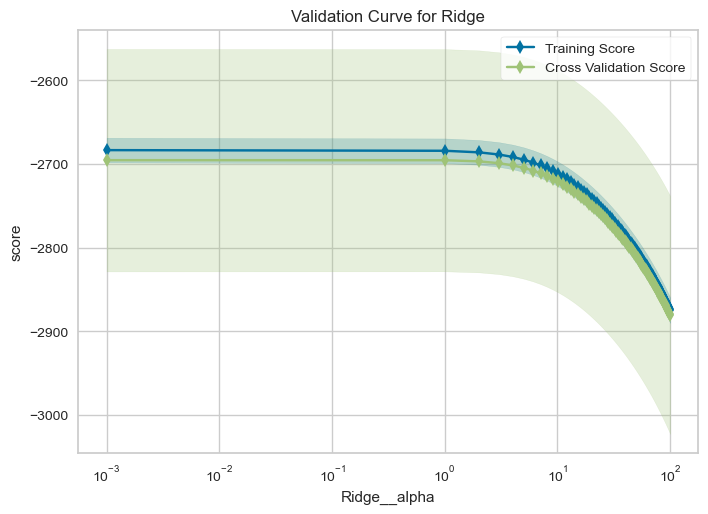

<Axes: title={'center': 'Validation Curve for Ridge'}, xlabel='Ridge__alpha', ylabel='score'>

In [138]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
    pipe_model, param_name="Ridge__alpha", param_range=np.linspace(0.001, 100, 100),
    logx=True, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

In [139]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[[...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [140]:
ridge_grid_model.best_estimator_

# hyper returns only values other than default from parameters. If our best alpha after gridsearch was 1,
# it wouldn't show 1 here.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge(alpha=0.001))])

In [141]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2695.374
mean_train_score   -2683.379
Name: 0, dtype: object

In [142]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.863,0.865
mae,1894.046,1844.629
mse,7204741.748,6860175.885
rmse,2684.165,2619.194


In [143]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [144]:
ridge_grid_model.best_estimator_["Ridge"].coef_

array([ 1.32735450e+03,  2.46584381e+03, -2.55247238e+03, -3.75583531e+03,
        3.70545025e+02, -3.70485479e+03,  5.84941910e+03,  1.18345055e+02,
       -3.42926428e+02, -3.32307881e+00,  4.16519876e+02,  1.34196016e+02,
        1.42824432e+02, -1.42285931e+03,  9.57223479e+02, -6.50277338e+01,
        6.50277335e+01, -1.97841186e+03, -1.27251050e+03,  4.57246763e+03,
       -1.32154532e+03, -4.05857794e+02,  6.61079284e+02, -2.55221491e+02,
       -3.64925380e+02,  3.64925379e+02, -3.73353138e+02, -1.67587132e+03,
        2.04922446e+03,  1.54831232e+03, -6.63748524e+01, -1.48193747e+03,
        1.82811437e+03, -1.07245355e+04,  1.95698361e+03,  3.97668405e+03,
       -1.42746537e+03,  1.17018778e+02, -7.76512106e+02, -5.37561963e+03,
       -1.64536242e+02,  2.54642863e+04, -1.40637077e+03, -1.48762518e+03])

In [145]:
ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Espace', 'body_type_Compact',
       'body_type_Convertible', 'body_type_Coupe', 'body_type_Off-Road',
       'body_type_Sedans', 'body_type_Station wagon',
       'body_type_Transporter', 'body_type_Van', 'vat_Price negotiable',
       'vat_VAT deductible', 'Fuel_Benzine', 'Fuel_Diesel',
       'Fuel_Electric', 'Fuel_LPG/CNG', 'Paint_Type_Metallic',
       'Paint_Type_Perl effect', 'Paint_Type_Uni/basic',
       'Upholstery_type_Cloth', 'Upholstery_type_Part/Full Leather',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic', 'Drive_chain_4WD',
       'Drive_chain_front', 'Drive_chain_rear', 'Type', 'km', 'Gears',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW',
       'Displace

In [146]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_,
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

# In order to get the coefficients and feature names, the model and encoder name you know through
# the model created with the pipeline should be used as a key.

,Coef
km,-10724.536
age,-5375.620
make_model_Opel Corsa,-3755.835
make_model_Renault Clio,-3704.855
make_model_Opel Astra,-2552.472
Fuel_Benzine,-1978.412
Gearing_Type_Manual,-1675.871
Weight_kg,-1487.625
Drive_chain_rear,-1481.937
Entertainment_Media,-1427.465


## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [147]:
from sklearn.linear_model import Lasso


In [148]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [149]:
X_train 

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
318,Audi A1,Compact,VAT deductible,56967.000,Used,Benzine,7.000,13,6,2,13,3.000,2.000,70.000,Metallic,Cloth,Automatic,999.000,1180.000,front
9972,Opel Insignia,Station wagon,Price negotiable,100000.000,Used,Diesel,6.000,19,8,8,20,3.000,1.000,100.000,Metallic,Part/Full Leather,Manual,1598.000,1613.000,front
6755,Opel Astra,Sedans,VAT deductible,22000.000,Used,Benzine,5.000,15,5,1,15,1.000,1.000,77.000,Metallic,Cloth,Manual,998.000,1273.000,front
12869,Renault Clio,Sedans,VAT deductible,19350.000,Demonstration,Benzine,6.000,18,7,6,16,1.000,1.000,162.000,Metallic,Cloth,Automatic,1618.000,1279.000,front
5935,Opel Astra,Sedans,VAT deductible,11534.000,Used,Benzine,6.000,16,5,2,15,1.000,1.000,110.000,Metallic,Cloth,Automatic,1399.000,1278.000,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,Opel Astra,Station wagon,VAT deductible,18423.000,Used,Diesel,6.000,10,7,2,12,2.000,1.000,100.000,Metallic,Cloth,Automatic,1598.000,1425.000,front
13430,Renault Espace,Van,VAT deductible,90000.000,Used,Diesel,6.000,29,8,7,24,3.000,1.000,118.000,Metallic,Part/Full Leather,Automatic,1598.000,1659.000,front
5402,Opel Astra,Station wagon,VAT deductible,72096.000,Used,Diesel,6.000,3,2,1,5,3.000,2.000,100.000,Metallic,Cloth,Automatic,1598.000,1425.000,front
860,Audi A1,Sedans,VAT deductible,37064.000,Used,Benzine,5.000,7,5,4,13,2.000,1.000,60.000,Metallic,Cloth,Manual,999.000,1135.000,front


In [150]:
y_train


318      14959
9972     13400
6755     14750
12869    26800
5935     17590
         ...  
5203     15790
13430    25100
5402     12290
860      14780
7282     18750
Name: price, Length: 11359, dtype: int64

In [151]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.863,0.865
mae,1893.709,1843.778
mse,7211067.467,6864380.347
rmse,2685.343,2619.996


## Cross Validation

In [152]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)

In [153]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.862
train_r2                                   0.863
test_neg_mean_absolute_error           -1900.833
train_neg_mean_absolute_error          -1893.267
test_neg_mean_squared_error         -7270759.405
train_neg_mean_squared_error        -7207822.012
test_neg_root_mean_squared_error       -2693.216
train_neg_root_mean_squared_error      -2684.699
dtype: float64

## Finding best alpha for Lasso

In [154]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(tol=900, max_iter= 900))]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space} # Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [155]:
column_trans


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['make_model', 'body_type', 'vat', 'Fuel',
                                  'Paint_Type', 'Upholstery_type',
                                  'Gearing_Type', 'Drive_chain']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Used',
                                                             "Employee's car",
                                                             'New',
                                                             'Demonstration',
                                                             'Pre-registered']]),
                                 ['Type'])],
                  verbose_feature_names_out=False)

In [156]:
operations

[('OneHot_Ordinal_Encoder',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('onehotencoder',
                                   OneHotEncoder(handle_unknown='ignore',
                                                 sparse_output=False),
                                   ['make_model', 'body_type', 'vat', 'Fuel',
                                    'Paint_Type', 'Upholstery_type',
                                    'Gearing_Type', 'Drive_chain']),
                                  ('ordinalencoder',
                                   OrdinalEncoder(categories=[['Used',
                                                               "Employee's car",
                                                               'New',
                                                               'Demonstration',
                                                               'Pre-registered']]),
                                   ['Type'])],
                    verbose_

In [157]:
model

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(max_iter=900, tol=900))])

In [158]:
param_grid

{'Lasso__alpha': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
        4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
        8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
        1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
        1.61624545e+01, 1.71725455e+01, 1.81826364e+01, 1.91927273e+01,
        2.02028182e+01, 2.12129091e+01, 2.22230000e+01, 2.32330909e+01,
        2.42431818e+01, 2.52532727e+01, 2.62633636e+01, 2.72734545e+01,
        2.82835455e+01, 2.92936364e+01, 3.03037273e+01, 3.13138182e+01,
        3.23239091e+01, 3.33340000e+01, 3.43440909e+01, 3.53541818e+01,
        3.63642727e+01, 3.73743636e+01, 3.83844545e+01, 3.93945455e+01,
        4.04046364e+01, 4.14147273e+01, 4.24248182e+01, 4.34349091e+01,
        4.44450000e+01, 4.54550909e+01, 4.64651818e+01, 4.74752727e+01,
        4.84853636e+01, 4.94954545e+01, 5.05055455e+01, 5.15156364e+01,
        5.25257273e+01, 5.35358182e+01, 5.454590

In [159]:
X_train

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
318,Audi A1,Compact,VAT deductible,56967.000,Used,Benzine,7.000,13,6,2,13,3.000,2.000,70.000,Metallic,Cloth,Automatic,999.000,1180.000,front
9972,Opel Insignia,Station wagon,Price negotiable,100000.000,Used,Diesel,6.000,19,8,8,20,3.000,1.000,100.000,Metallic,Part/Full Leather,Manual,1598.000,1613.000,front
6755,Opel Astra,Sedans,VAT deductible,22000.000,Used,Benzine,5.000,15,5,1,15,1.000,1.000,77.000,Metallic,Cloth,Manual,998.000,1273.000,front
12869,Renault Clio,Sedans,VAT deductible,19350.000,Demonstration,Benzine,6.000,18,7,6,16,1.000,1.000,162.000,Metallic,Cloth,Automatic,1618.000,1279.000,front
5935,Opel Astra,Sedans,VAT deductible,11534.000,Used,Benzine,6.000,16,5,2,15,1.000,1.000,110.000,Metallic,Cloth,Automatic,1399.000,1278.000,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,Opel Astra,Station wagon,VAT deductible,18423.000,Used,Diesel,6.000,10,7,2,12,2.000,1.000,100.000,Metallic,Cloth,Automatic,1598.000,1425.000,front
13430,Renault Espace,Van,VAT deductible,90000.000,Used,Diesel,6.000,29,8,7,24,3.000,1.000,118.000,Metallic,Part/Full Leather,Automatic,1598.000,1659.000,front
5402,Opel Astra,Station wagon,VAT deductible,72096.000,Used,Diesel,6.000,3,2,1,5,3.000,2.000,100.000,Metallic,Cloth,Automatic,1598.000,1425.000,front
860,Audi A1,Sedans,VAT deductible,37064.000,Used,Benzine,5.000,7,5,4,13,2.000,1.000,60.000,Metallic,Cloth,Manual,999.000,1135.000,front


In [160]:
y_train

318      14959
9972     13400
6755     14750
12869    26800
5935     17590
         ...  
5203     15790
13430    25100
5402     12290
860      14780
7282     18750
Name: price, Length: 11359, dtype: int64

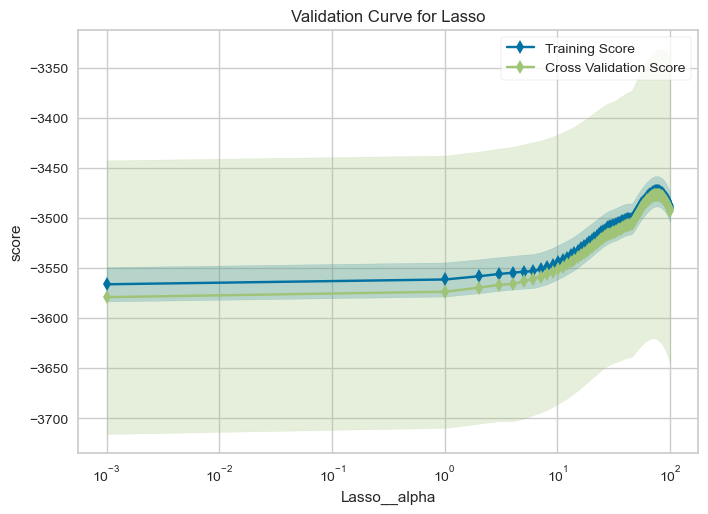

<Axes: title={'center': 'Validation Curve for Lasso'}, xlabel='Lasso__alpha', ylabel='score'>

In [161]:
viz = ValidationCurve(
    model, param_name="Lasso__alpha", param_range=np.linspace(0.001, 100, 100),
    logx=True, cv=10, scoring="neg_root_mean_squared_error", n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show()
###################

In [162]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[[...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [163]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso',
                 Lasso(alpha=75.7578181818182, max_iter=900, tol=900))])

In [164]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3476.651
mean_train_score   -3473.259
Name: 75, dtype: object

In [165]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.771,0.762
mae,2490.599,2493.837
mse,12064897.398,12085638.738
rmse,3473.456,3476.441


In [166]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [167]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_,
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

,Coef
km,-9050.699
make_model_Opel Corsa,-7033.150
make_model_Renault Clio,-6131.030
Upholstery_type_Cloth,-2563.935
age,-2107.072
make_model_Opel Astra,-1272.690
vat_Price negotiable,-1115.089
Gearing_Type_Manual,-606.699
Fuel_Diesel,-41.267
body_type_Station wagon,-14.997


## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [168]:
from sklearn.linear_model import ElasticNet

In [169]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet(tol=5000, max_iter= 5000))]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(max_iter=5000, tol=5000))])

In [170]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.514,0.518
mae,3797.093,3722.280
mse,25636038.919,24537331.222
rmse,5063.204,4953.517


## Cross Validation

In [171]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet(tol=5000, max_iter= 5000))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)

In [172]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     0.512
train_r2                                    0.514
test_neg_mean_absolute_error            -3799.412
train_neg_mean_absolute_error           -3796.085
test_neg_mean_squared_error         -25668235.831
train_neg_mean_squared_error        -25622828.035
test_neg_root_mean_squared_error        -5064.016
train_neg_root_mean_squared_error       -5061.873
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [173]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet(tol=1000, max_iter= 1000))]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [174]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[[...',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'New',
                                                                                                     'Demonstration',
                                                                                                     'Pre-registered']]),
                                                                         ['Type'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet(tol=1000))]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [175]:
elastic_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=3, l1_ratio=0.99, tol=1000))])

In [176]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3495.412
mean_train_score   -3491.403
Name: 34, dtype: object

In [177]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.769,0.763
mae,2540.261,2535.522
mse,12196173.935,12040066.616
rmse,3492.302,3469.880


In [178]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)

## Feature İmportance

In [179]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_,
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
                         columns=["Coef"]
                         ).sort_values("Coef")

In [180]:
df_feat_imp

,Coef
km,-9050.699
make_model_Opel Corsa,-7033.150
make_model_Renault Clio,-6131.030
Upholstery_type_Cloth,-2563.935
age,-2107.072
make_model_Opel Astra,-1272.690
vat_Price negotiable,-1115.089
Gearing_Type_Manual,-606.699
Fuel_Diesel,-41.267
body_type_Station wagon,-14.997


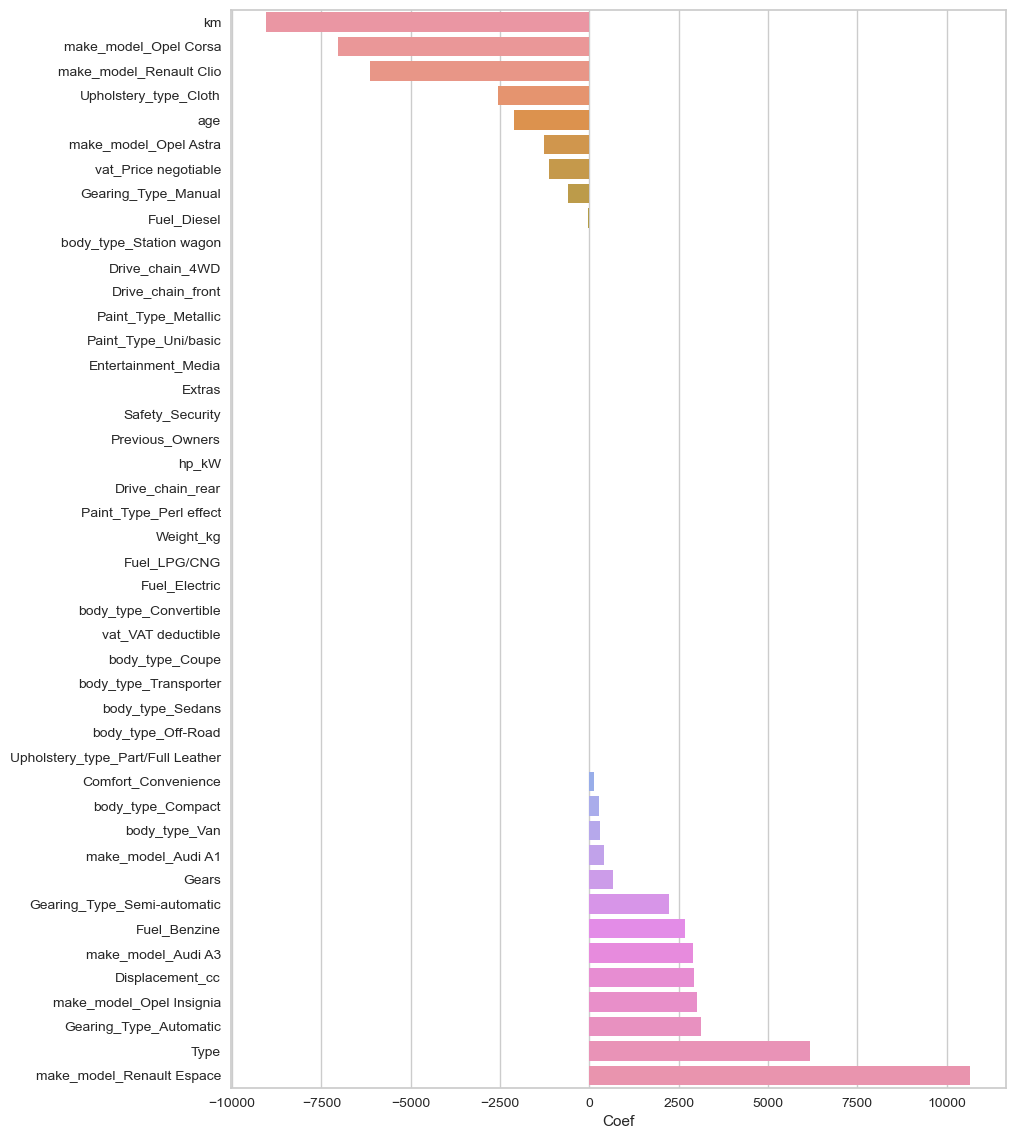

In [181]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp,
            x=df_feat_imp.Coef,
            y=df_feat_imp.index);

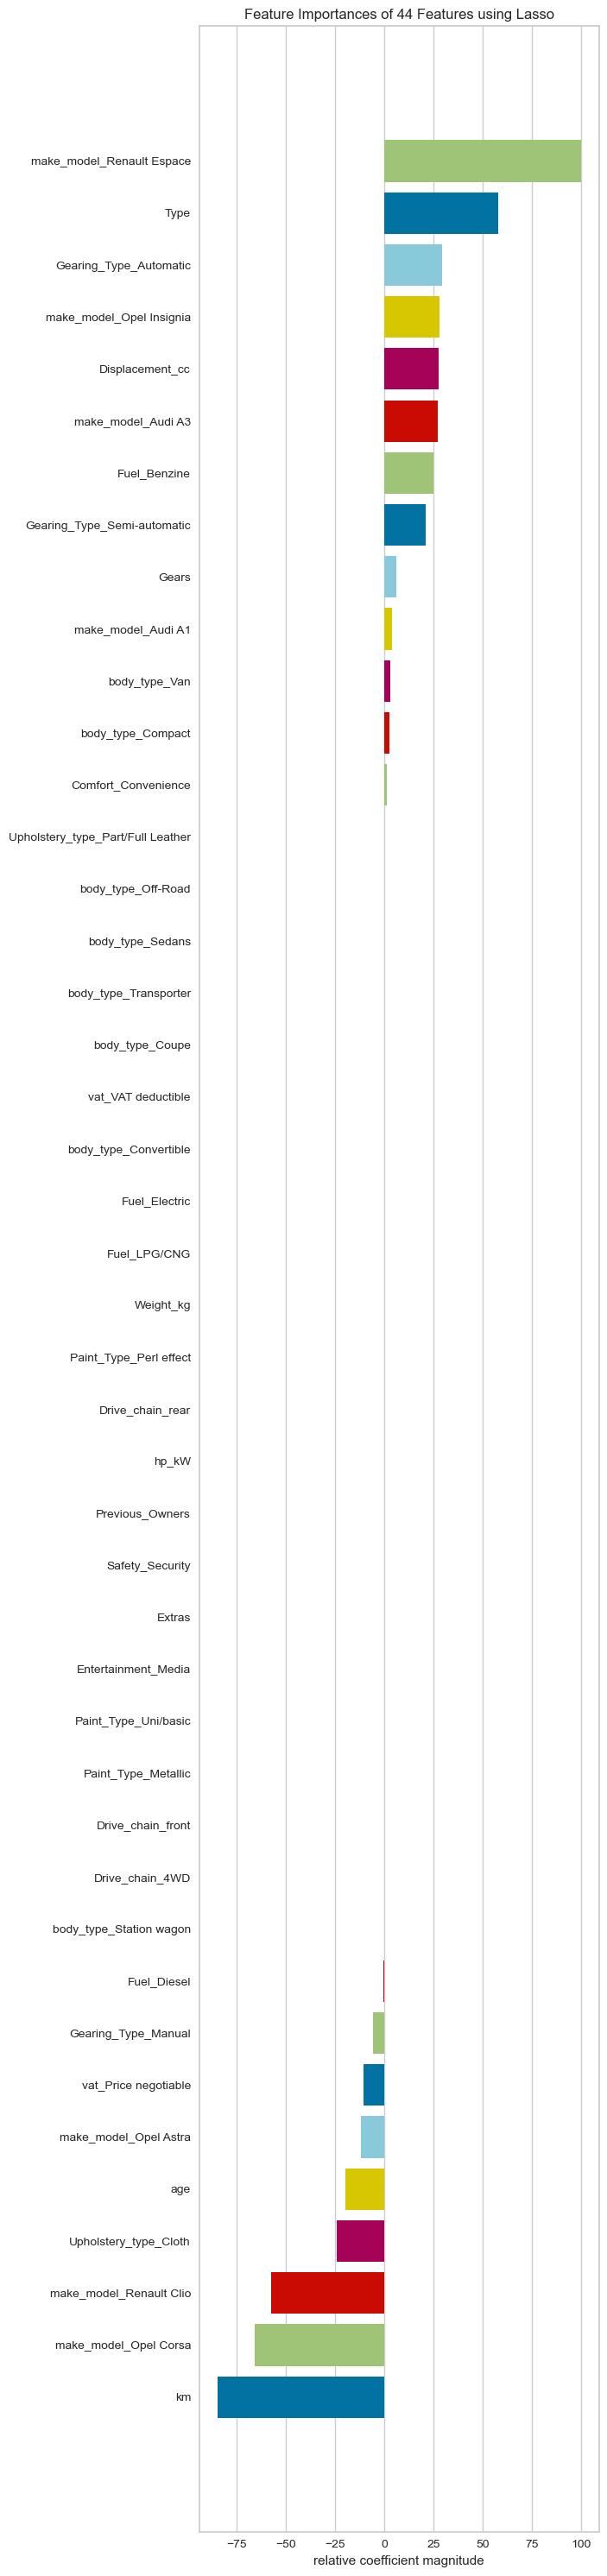

In [182]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"]

viz = FeatureImportances(model,
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

# We do not forget that we need to use the lasso model, as we will do a feature selection.

In [183]:
df3.head(1)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,Metallic,Cloth,Automatic,1422.000,1220.000,front


In [184]:
df_new = df3[["make_model", "price", "vat", "km","Type", "Fuel", "age", "Upholstery_type", "Gearing_Type"]]

# we select the top 8 features that have the most impact on prediction. Here, a question may come up as
#

In [185]:
df_new

,make_model,price,vat,km,Type,Fuel,age,Upholstery_type,Gearing_Type
0,Audi A1,15770,VAT deductible,56013.000,Used,Diesel,3.000,Cloth,Automatic
1,Audi A1,14500,Price negotiable,80000.000,Used,Benzine,2.000,Cloth,Automatic
2,Audi A1,14640,VAT deductible,83450.000,Used,Diesel,3.000,Cloth,Automatic
3,Audi A1,14500,VAT deductible,73000.000,Used,Diesel,3.000,Cloth,Automatic
4,Audi A1,16790,VAT deductible,16200.000,Used,Diesel,3.000,Cloth,Automatic
...,...,...,...,...,...,...,...,...,...
14216,Renault Espace,39980,VAT deductible,100.000,Pre-registered,Diesel,0.000,Part/Full Leather,Automatic
14217,Renault Espace,39950,VAT deductible,1647.363,New,Diesel,0.000,Part/Full Leather,Automatic
14218,Renault Espace,39950,VAT deductible,1000.000,Demonstration,Benzine,0.000,Part/Full Leather,Automatic
14219,Renault Espace,39885,VAT deductible,9900.000,Used,Benzine,0.000,Cloth,Automatic


In [186]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# According to our data set with 8 new features, we determine our X and y and reconstruct the model.
# And we repeat the operations we did above.

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
X_train.head()

,make_model,vat,km,Type,Fuel,age,Upholstery_type,Gearing_Type
318,Audi A1,VAT deductible,56967.000,Used,Benzine,3.000,Cloth,Automatic
9972,Opel Insignia,Price negotiable,100000.000,Used,Diesel,3.000,Part/Full Leather,Manual
6755,Opel Astra,VAT deductible,22000.000,Used,Benzine,1.000,Cloth,Manual
12869,Renault Clio,VAT deductible,19350.000,Demonstration,Benzine,1.000,Cloth,Automatic
5935,Opel Astra,VAT deductible,11534.000,Used,Benzine,1.000,Cloth,Automatic


In [189]:
df_new.Type.unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered'],
      dtype=object)

In [190]:
cat_onehot = ['make_model', 'vat', 'Fuel', 'Upholstery_type', 'Gearing_Type']
cat_ordinal = ['Type']

cat_for_type = ["Used", "Employee's car", 'New', "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) #MinMaxScaler()

In [191]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.816,0.814
mae,2127.716,2083.479
mse,9708586.698,9477641.842
rmse,3115.861,3078.578


## Cross Validate

In [192]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001, tol=1000, max_iter=1000))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)

In [193]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                     0.734
train_r2                                    0.736
test_neg_mean_absolute_error            -2787.962
train_neg_mean_absolute_error           -2784.187
test_neg_mean_squared_error         -13962587.332
train_neg_mean_squared_error        -13904109.999
test_neg_root_mean_squared_error        -3734.662
train_neg_root_mean_squared_error       -3728.793
dtype: float64

In [194]:
3735/df_new.price.mean()

0.20702316760477624

In [195]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred,squared=False)

## 7. Visually Compare Models Performance In a Graph

In [196]:
scores = {"linear_m": {"r2_score": lm_R2 ,
 "mae": lm_mae,
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2,
 "mae": rm_mae,
 "rmse": rm_rmse},

 "lasso_m": {"r2_score": lasm_R2,
 "mae": lasm_mae,
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2,
 "mae": em_mae,
 "rmse": em_rmse},

 "final_m": {"r2_score": fm_R2,
 "mae": fm_mae ,
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

# We assign the metrics we get from all models to the scores variable in jason format.
# Then we get the transpose of df so that the model names appear in the index and the metrics in the features.

,r2_score,mae,rmse
linear_m,0.865,1843.983,2619.124
ridge_m,0.865,1844.629,2619.194
lasso_m,0.762,2493.837,3476.441
elastic_m,0.763,2535.522,3469.880
final_m,0.814,2083.479,3078.578


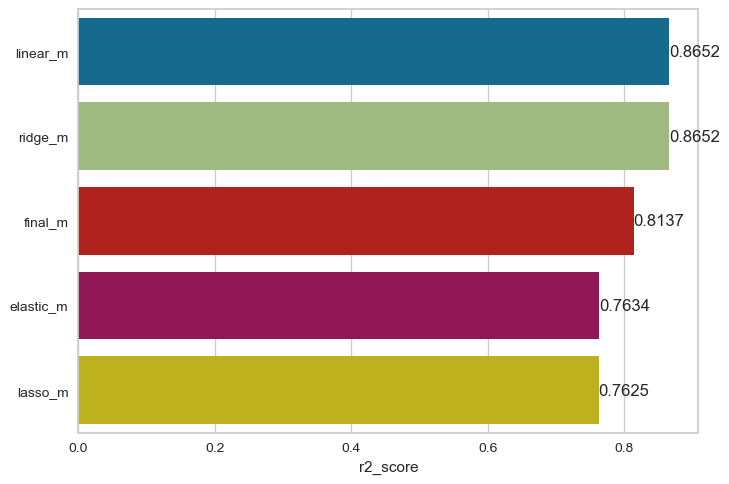

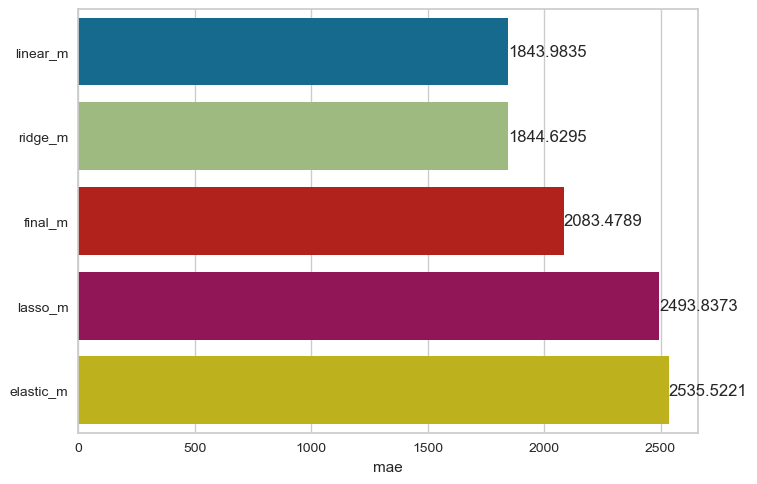

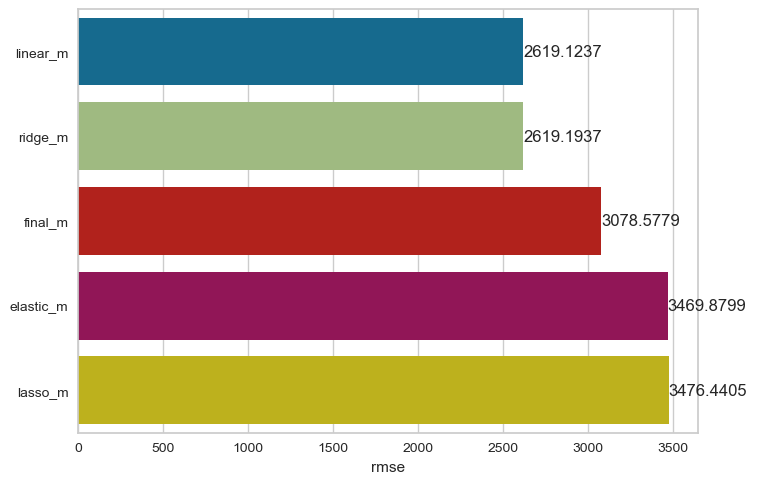

In [197]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # if our metric is r2_score the barplot will be sorted from largest to smallest
    else:
        ascending = True # if our metric is mae or rmse then barplot will be sorted from smallest to largest
    compare = scores.sort_values(by=j, ascending=ascending) # reorders compare df by corresponding metric
    ax = sns.barplot(x = compare[j] , y= compare.index) # The metric scores of compare[j] are drawn sequentially from compare df
                                                        # and visualized in the barplot.
                                                        # y=compare.index will write the model names on the y-axis of our image.
    ax.bar_label(ax.containers[0], fmt="%.4f"); # annotate It is arranged as 4 digits from ".".

## Final Model and Prediction new observation

In [198]:
X = df_new.drop(columns = ["price"])
y = df_new.price



In [199]:
X.head()

,make_model,vat,km,Type,Fuel,age,Upholstery_type,Gearing_Type
0,Audi A1,VAT deductible,56013.000,Used,Diesel,3.000,Cloth,Automatic
1,Audi A1,Price negotiable,80000.000,Used,Benzine,2.000,Cloth,Automatic
2,Audi A1,VAT deductible,83450.000,Used,Diesel,3.000,Cloth,Automatic
3,Audi A1,VAT deductible,73000.000,Used,Diesel,3.000,Cloth,Automatic
4,Audi A1,VAT deductible,16200.000,Used,Diesel,3.000,Cloth,Automatic


In [200]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001,  tol=1000, max_iter=1000))]
final_model = Pipeline(steps=operations)



In [201]:
final_model.fit(X, y)

# What does final_model.fit(X,y) do here, respectively?
# The first action in the final_model is column_trans;
# 1. Onehotencoder conversion is done to featurs (cat_onehot) in X data that will apply onehotencoder conversion.
# 2. Ordinalencoder conversion is done to featurs (cat_ordinal) in X data to which ordinalencoder conversion will be applied.
# 3. Except for the converted featurs, no action is taken on the remaining featurs, they are left as is.
# Since the second action in the final_model is MinMaxScaler();
# 4. After the transformation, minmax scale is applied to the new numeric X we get. Dummies features consisting of 0s and 1s in our data
# Since, minmaxscale was applied so that these observations remain 0 and 1 again.
# The third action in the final_model is Lasso();
# 5. Transformed and scaled X together with y Lasso are given to the model and the training is completed.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'vat', 'Fuel',
                                                   'Upholstery_type',
                                                   'Gearing_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=0.001, tol=1000))])

In [202]:
X

,make_model,vat,km,Type,Fuel,age,Upholstery_type,Gearing_Type
0,Audi A1,VAT deductible,56013.000,Used,Diesel,3.000,Cloth,Automatic
1,Audi A1,Price negotiable,80000.000,Used,Benzine,2.000,Cloth,Automatic
2,Audi A1,VAT deductible,83450.000,Used,Diesel,3.000,Cloth,Automatic
3,Audi A1,VAT deductible,73000.000,Used,Diesel,3.000,Cloth,Automatic
4,Audi A1,VAT deductible,16200.000,Used,Diesel,3.000,Cloth,Automatic
...,...,...,...,...,...,...,...,...
14216,Renault Espace,VAT deductible,100.000,Pre-registered,Diesel,0.000,Part/Full Leather,Automatic
14217,Renault Espace,VAT deductible,1647.363,New,Diesel,0.000,Part/Full Leather,Automatic
14218,Renault Espace,VAT deductible,1000.000,Demonstration,Benzine,0.000,Part/Full Leather,Automatic
14219,Renault Espace,VAT deductible,9900.000,Used,Benzine,0.000,Cloth,Automatic


In [203]:
my_dict = {
    "make_model": 'Audi A1',
    "vat": 'VAT deductible',
    "km": 56013.000,
    "Type": 'Used',
    "Fuel": 'Diesel',
    "age": 3.000,
    "Upholstery_type": 'Cloth',
    "Gearing_Type": 'Automatic'
}

In [204]:
X.head()

# The feature order of the observation we will predict should be the same as the feature order of the data we train.

,make_model,vat,km,Type,Fuel,age,Upholstery_type,Gearing_Type
0,Audi A1,VAT deductible,56013.000,Used,Diesel,3.000,Cloth,Automatic
1,Audi A1,Price negotiable,80000.000,Used,Benzine,2.000,Cloth,Automatic
2,Audi A1,VAT deductible,83450.000,Used,Diesel,3.000,Cloth,Automatic
3,Audi A1,VAT deductible,73000.000,Used,Diesel,3.000,Cloth,Automatic
4,Audi A1,VAT deductible,16200.000,Used,Diesel,3.000,Cloth,Automatic


In [205]:
new_obs = pd.DataFrame([my_dict])
new_obs



,make_model,vat,km,Type,Fuel,age,Upholstery_type,Gearing_Type
0,Audi A1,VAT deductible,56013.000,Used,Diesel,3.000,Cloth,Automatic


In [206]:
final_model.predict(new_obs)

array([15435.52787731])

In [207]:
# when feature order is different

my_dict = {
    "Type": 'Used',
    "Fuel": 'Diesel',
    "age": 3.000,
    "make_model": 'Audi A1',
    "vat": 'VAT deductible',
    "km": 56013.000,
    "Upholstery_type": 'Cloth',
    "Gearing_Type": 'Automatic'
}

new_obs = pd.DataFrame([my_dict])
new_obs

,Type,Fuel,age,make_model,vat,km,Upholstery_type,Gearing_Type
0,Used,Diesel,3.000,Audi A1,VAT deductible,56013.000,Cloth,Automatic


In [208]:
final_model.predict(new_obs)

# new_obs and X's feature order is different. make_column_transformer detects this difference and adjusts
# the feature order of new_obs to the feature order of the X data it is training.

array([15435.52787731])

- Deployment

In [209]:
new_list=["age", "hp_kW", "km", "Gearing_Type", 'make_model']

In [214]:
X=df[new_list]
y=df['price']

In [215]:
X.sample(5)

,age,hp_kW,km,Gearing_Type,make_model
7970,3.000,66.000,51933.000,Manual,Opel Corsa
12827,2.000,54.000,30120.000,Manual,Renault Clio
3011,1.000,110.000,7000.000,Semi-automatic,Audi A3
2029,0.000,85.000,3000.000,Manual,Audi A1
1977,0.000,85.000,1647.363,Automatic,Audi A1


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [217]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [218]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gearing_Type', 'make_model'], dtype='object')

In [219]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [220]:
X_train.iloc[1]

age                  0.000
hp_kW               66.000
km                  10.000
Gearing_Type     Automatic
make_model      Opel Corsa
Name: 8431, dtype: object

In [221]:
X_train=column_trans.fit_transform(X_train)

In [222]:
X_test=column_trans.transform(X_test)

In [223]:
X_train

array([[1.00000e+00, 5.00000e+00, 2.00000e+00, 5.50000e+01, 2.62550e+04],
       [0.00000e+00, 3.00000e+00, 0.00000e+00, 6.60000e+01, 1.00000e+01],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, 8.50000e+01, 6.00000e+03],
       ...,
       [1.00000e+00, 4.00000e+00, 3.00000e+00, 8.80000e+01, 1.29618e+05],
       [0.00000e+00, 4.00000e+00, 1.00000e+00, 1.21000e+02, 2.81680e+04],
       [1.00000e+00, 1.00000e+00, 3.00000e+00, 8.10000e+01, 8.60000e+04]])

In [224]:
pd.Series(X_train[1])

0    0.000
1    3.000
2    0.000
3   66.000
4   10.000
dtype: float64

In [225]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [229]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [232]:
eval_metrics(y_test,y_pred)

 r2_score: 0.9266876847359167 
 mae: 1244.7059674754971 
 mse: 3920315.579155827 
 rmse: 1979.9786814902395


In [226]:
y_pred = rf_model.predict(X_test)

In [233]:
import pickle
pickle.dump(rf_model, open('rf_model_new', 'wb'))

In [234]:
pickle.dump(column_trans, open('transformer', 'wb'))

In [235]:
ds13_model = pickle.load(open('rf_model_new', 'rb'))

In [236]:
ds13_transformer = pickle.load(open('transformer', 'rb'))

In [237]:
columns=list(X.columns)
columns

['age', 'hp_kW', 'km', 'Gearing_Type', 'make_model']

In [238]:
my_dict = {
    "age": 2,
    "hp_kW": 105,
    "km": 100000,
    "Gearing_Type":"Automatic",
    "make_model": 'Audi A3'
}

In [239]:
df = pd.DataFrame.from_dict([my_dict])

In [240]:
df.head()

,age,hp_kW,km,Gearing_Type,make_model
0,2,105,100000,Automatic,Audi A3


In [241]:
df2 = ds13_transformer.transform(df)

In [242]:
pd.Series(df2[0])

0        0.000
1        1.000
2        2.000
3      105.000
4   100000.000
dtype: float64

In [243]:
prediction = ds13_model.predict(df2)
prediction

array([19424.])

In [244]:
print("The estimated price of your car is €{}. ".format(int(prediction[0])))

The estimated price of your car is €19424. 
